# Network Analysis in R

## Getting started


* Create a new (_writable_) directory to install R packages
* Install the R packages we'll need (this might take awhile) into the newly created directory
* Make sure to load in 'network' package **LAST** or else some important functions will be overwritten
* Then add this new directory to the default locations in which R will search for package dependencies 

In [ ]:
dir.createate('/home/jupyter/installedRPackages')

In [17]:
install.packages(c('xtable','intergraph','Matrix','sna','igraph','diagram',
                   'jpeg','blockmodels','latentnet','RColorBrewer','ggnetwork','plotly',
                   'ergm','ndtv','dnc','plot3D','plot3Drgl','network'),
                 lib='/home/jupyter/installedRPackages')

also installing the dependency ‘rgl’

Warning message in install.packages(c("xtable", "intergraph", "Matrix", "sna", "igraph", :
“installation of package ‘rgl’ had non-zero exit status”Warning message in install.packages(c("xtable", "intergraph", "Matrix", "sna", "igraph", :
“installation of package ‘plotly’ had non-zero exit status”Warning message in install.packages(c("xtable", "intergraph", "Matrix", "sna", "igraph", :
“installation of package ‘plot3Drgl’ had non-zero exit status”Warning message in install.packages(c("xtable", "intergraph", "Matrix", "sna", "igraph", :
“installation of package ‘dnc’ had non-zero exit status”

In [2]:
.libPaths( c( .libPaths(), "/home/jupyter/installedRPackages") )

In [3]:
library(xtable,lib.loc='/home/jupyter/installedRPackages')
library(intergraph,lib.loc='/home/jupyter/installedRPackages')
library(Matrix,lib.loc='/home/jupyter/installedRPackages')
library(sna,lib.loc='/home/jupyter/installedRPackages')
library(igraph,lib.loc='/home/jupyter/installedRPackages')
library(diagram,lib.loc='/home/jupyter/installedRPackages')
library(jpeg,lib.loc='/home/jupyter/installedRPackages')
library(blockmodels,lib.loc='/home/jupyter/installedRPackages')
library(latentnet,lib.loc='/home/jupyter/installedRPackages')
library(RColorBrewer,lib.loc='/home/jupyter/installedRPackages')
library(ggnetwork,lib.loc='/home/jupyter/installedRPackages')
#library(plotly,lib.loc='/home/jupyter/installedRPackages')
library(ergm,lib.loc='/home/jupyter/installedRPackages')
library(ndtv,lib.loc='/home/jupyter/installedRPackages')
#library(dnc,lib.loc='/home/jupyter/installedRPackages')
library(plot3D,lib.loc='/home/jupyter/installedRPackages')
#library(plot3Drgl,lib.loc='/home/jupyter/installedRPackages')
library(network,lib.loc='/home/jupyter/installedRPackages')

Loading required package: statnet.common
Loading required package: network
network: Classes for Relational Data
Version 1.13.0 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.

sna: Tools for Social Network Analysis
Version 2.4 created on 2016-07-23.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.


Attaching package: ‘igraph’

The following objects are masked from ‘package:sna’:

    betweenness, bonpow, closeness, components, degree, dyad.census,
    evcent, hierarchy, is.conn

In [4]:
bk6 <- as.matrix(read.table("http://myweb.uiowa.edu/dksewell/hpbook6.txt"))
diag(bk6)=0
hpnames = read.table("http://myweb.uiowa.edu/dksewell/hpnames.txt",
                     header=T,stringsAsFactors = F)[,2]
colnames(bk6) = rownames(bk6) = hpnames
dim(bk6);

t(as.matrix(table(c(bk6))))

[1] 64 64

0  1
[1,] 4043 53

In [5]:
bk6Sp = Matrix(bk6)
round(object.size(bk6Sp)/object.size(bk6),3)

0.265 bytes

In [6]:
bk6EL = which(bk6==1,arr.ind=T)
rownames(bk6EL)=NULL
bk6EL = data.frame(s=bk6EL[,1],
                     r=bk6EL[,2],
                     sName=rownames(bk6)[bk6EL[,1]],
                     rName=colnames(bk6)[bk6EL[,2]])
head(bk6EL)

s  r              sName          rName
1 56 11     Ronald Weasley    Dean Thomas
2 58 11    Seamus Finnigan    Dean Thomas
3 21 12      Ginny Weasley Demelza Robins
4 25 12 Harry James Potter Demelza Robins
5 27 12       Jimmy Peakes Demelza Robins
6 23 14      Gregory Goyle   Draco Malfoy

In [7]:
hp.attributes <- 
  read.table("http://myweb.uiowa.edu/dksewell/hpattributes.txt", 
                                      header=TRUE)
head(hp.attributes)
bk6net = network(bk6,vertex.attr=as.data.frame(hp.attributes[,-1]))


id schoolyear gender house
1  1       1989      1     4
2  2       1989      2     1
3  3       1989      2     1
4  4       1991      1     3
5  5       1991      1     4
6  6       1989      1     4

In [8]:
bk6ig = graph.adjacency(bk6,mode='directed')
vertex_attr(bk6ig,'gender') = hp.attributes[,'gender']
vertex_attr(bk6ig,'house') = hp.attributes[,'house']
vertex_attr(bk6ig,'schoolyear') = hp.attributes[,'schoolyear']
igraph::list.vertex.attributes(bk6ig)

[1] "name"       "gender"     "house"      "schoolyear"

In [9]:
test = asNetwork(bk6ig)
all.equal(c(as.matrix(test)),c(as.matrix(bk6net)))
test = asIgraph(bk6net)
all.equal(c(as.matrix(as_adj(test))),c(as.matrix(as_adj(bk6ig))))

[1] TRUE

[1] TRUE

In [10]:
hpWeighted <- bk6
for(i in 1:5){
  hpWeighted = hpWeighted +
    as.matrix(read.table(
      paste("http://myweb.uiowa.edu/dksewell/hpbook",i,".txt",sep='')))
}
diag(hpWeighted) = 0L
colnames(hpWeighted) = rownames(hpWeighted) = hpnames
ind2rm = which(rowSums(hpWeighted)==0 & colSums(hpWeighted)==0)
hpWeighted = hpWeighted[-ind2rm,-ind2rm]
dim(hpWeighted);
hpig = graph.adjacency(hpWeighted,mode='directed',weighted=TRUE)
vertex_attr(hpig,'gender') = hp.attributes[-ind2rm,'gender']
vertex_attr(hpig,'house') = hp.attributes[-ind2rm,'house']
vertex_attr(hpig,'schoolyear') = hp.attributes[-ind2rm,'schoolyear']

[1] 37 37

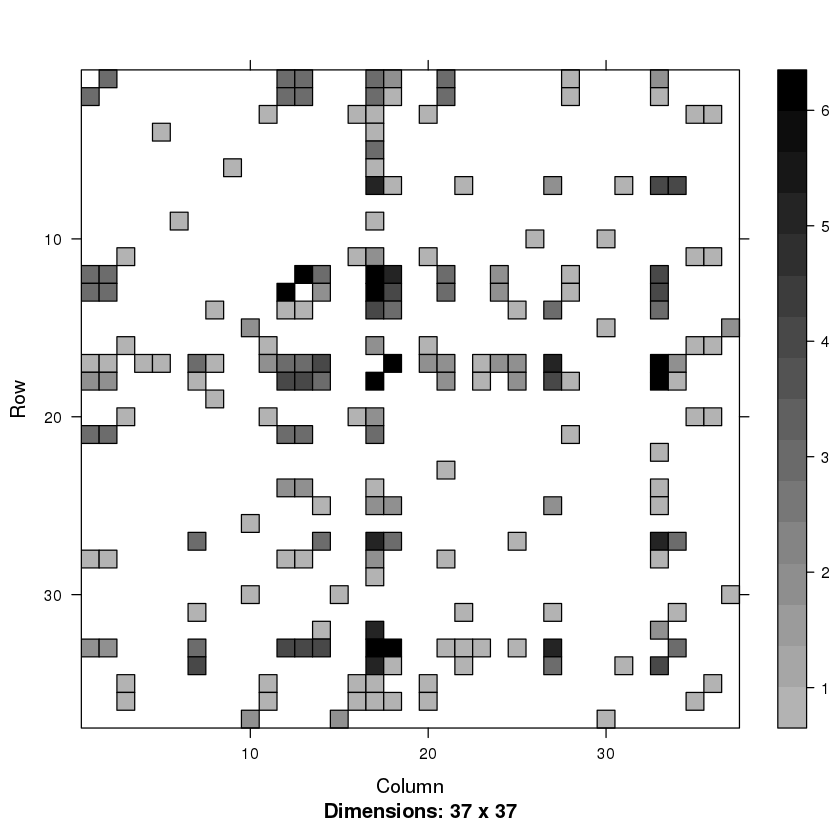

In [11]:
image(Matrix(hpWeighted),colorkey=T)

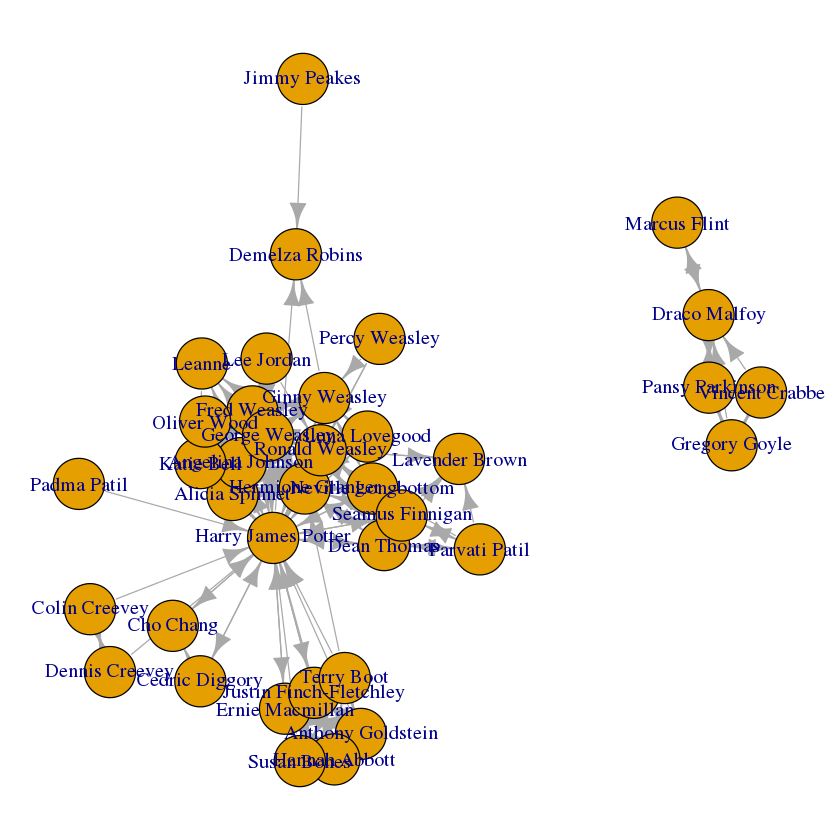

In [12]:
set.seed(1)
par(mar=rep(1,4))
plot(hpig)

In [13]:
set.seed(1)
loList = list()
loList[[1]] = layout_nicely(hpig)
loList[[2]] = layout.gem(hpig)
loList[[3]] = layout.mds(hpig)
loList[[4]] = layout_with_fr(hpig)
loList[[5]] = layout_with_kk(hpig)

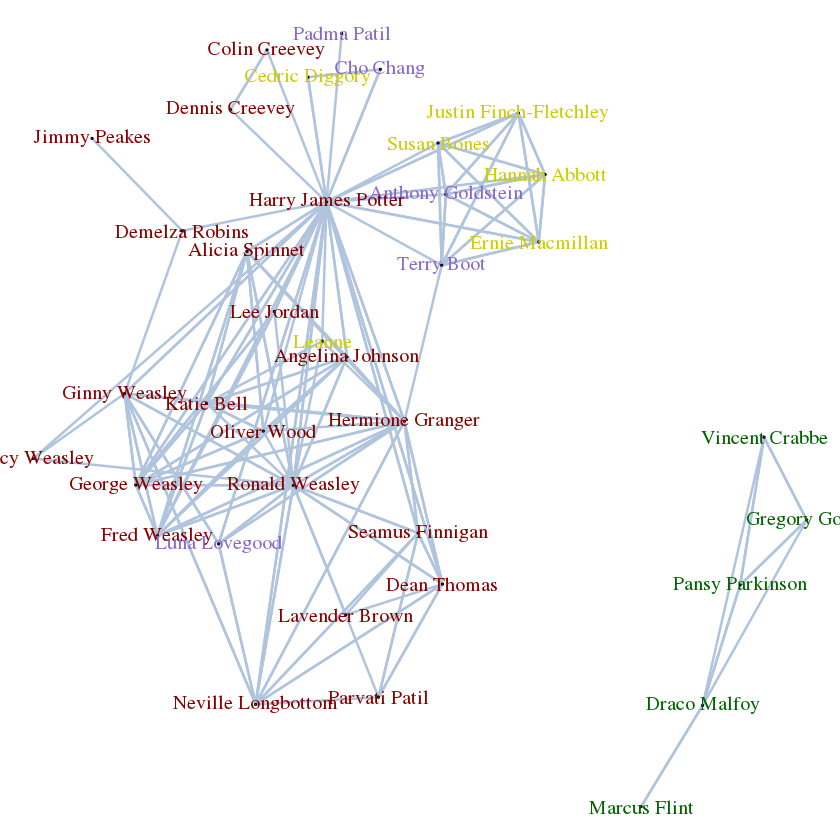

In [14]:
par(mar=rep(0.1,4))
plot(hpig,
     vertex.size=0,
     vertex.label.color=
       c('darkred','yellow3','mediumpurple3','darkgreen')[V(hpig)$house],
     edge.color='lightsteelblue',
     edge.arrow.size=0,
     edge.width=2,
     layout=loList[[5]])

In [66]:
par(mar=rep(0.1,4))
try({
tkplot(hpig,
     vertex.size=0,
     vertex.label.color=
       c('darkred','yellow3','mediumpurple3','darkgreen')[V(hpig)$house],
     edge.color='lightsteelblue',
     edge.arrow.size=0,
     edge.width=2,
     layout=loList[[5]]) } , silent=T)

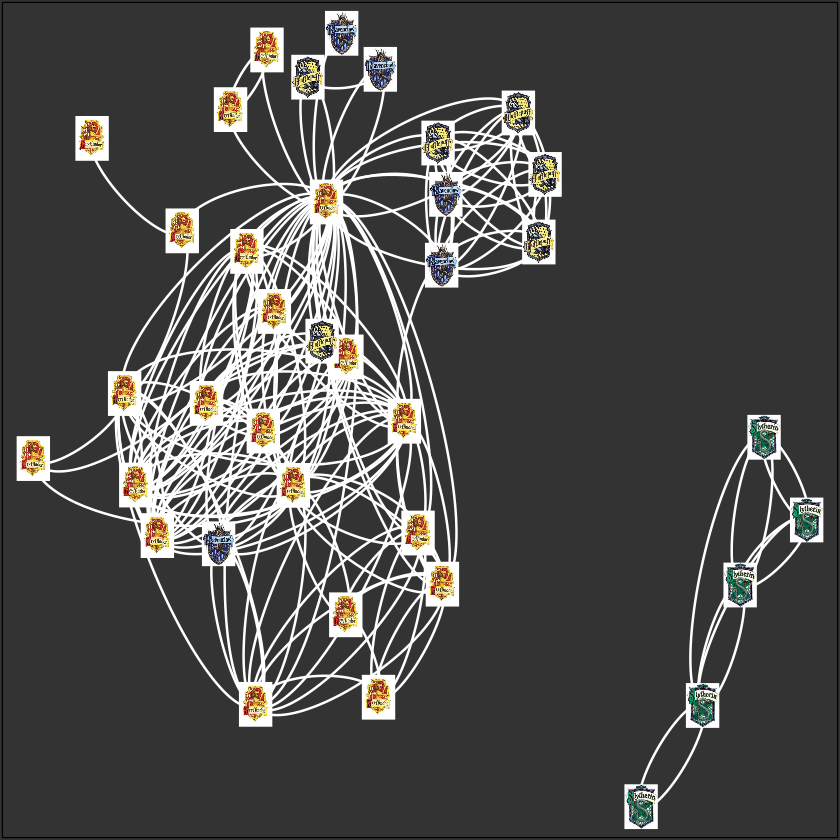

In [19]:
figs =  list()
figs$gryffindor <- readJPEG('gryffindor.jpg')
figs$hufflepuff <- readJPEG('hufflepuff.jpg')
figs$ravenclaw <- readJPEG('ravenclaw.jpg')
figs$slytherin <- readJPEG('slytherin.jpg')
par(mar=rep(0.1,4),bg=gray(0.2))
plot(0,type='n',ylim=range(loList[[5]][,2]),
     xlim=range(loList[[5]][,1]),xaxt='n',yaxt='n',
     ylab='',xlab='')
os=0.2
eList = get.edgelist(hpig,names=F)
for(ee in 1:ecount(hpig)){
  curvedarrow(loList[[5]][eList[ee,1],],loList[[5]][eList[ee,2],],arr.length=0,curve=0.15,
              lcol='white',
              lwd=2)
}
for(i in 1:vcount(hpig)){
  rasterImage(figs[[V(hpig)$house[i]]],
              loList[[5]][i,1]-os,
              loList[[5]][i,2]-os,
              loList[[5]][i,1]+os,
              loList[[5]][i,2]+os)
}

In [67]:
set.seed(2)
try({
hp.ggplot=
  ggplot(hpig, aes(x = x, y = y, xend = xend, yend = yend)) +
  geom_edges(color = adjustcolor('steelblue',alpha.f=0.5),size=1) +
  # geom_nodes(aes(color = factor(house)),size=3) +
  geom_nodes(color = c('darkred','yellow3','mediumpurple3','darkgreen')[V(hpig)$house],
             size=3,shape=14+V(hpig)$gender,
             aes(text = vertex.names)) +
  theme_blank()
hp.ggplot

hp.ggplot %>% ggplotly(tooltip="text")
}, silent=TRUE)

outDeg              inDeg
1      Ginny Weasley         Katie Bell
2       Fred Weasley       Fred Weasley
3     George Weasley     George Weasley
4   Hermione Granger   Hermione Granger
5     Ronald Weasley     Ronald Weasley
6 Harry James Potter Harry James Potter

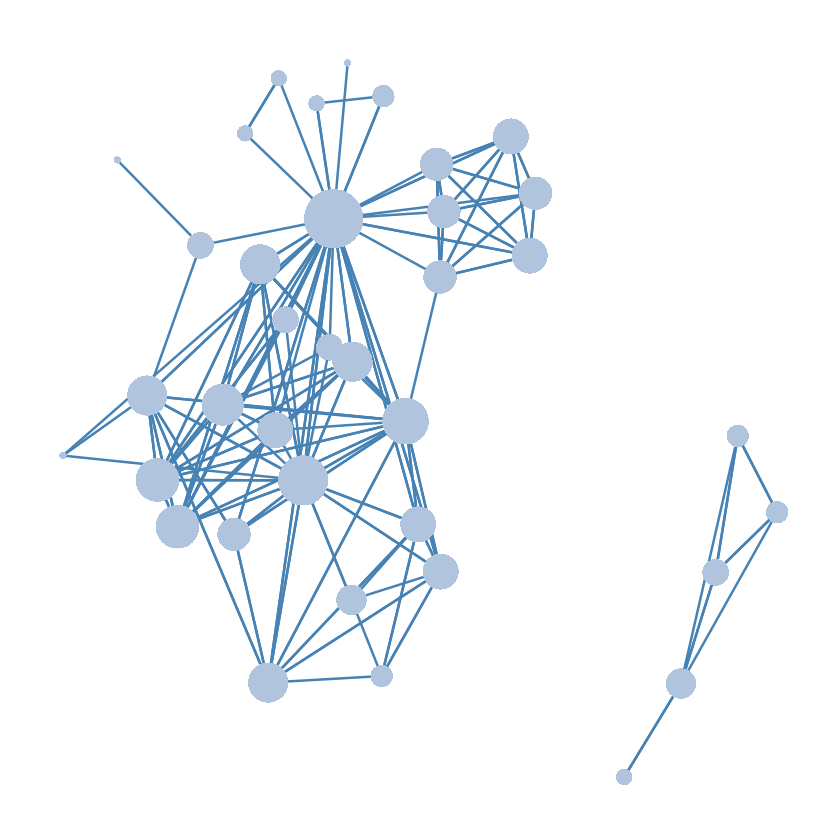

In [22]:
outDeg = igraph::degree(hpig,mode='out')
inDeg = igraph::degree(hpig,mode='in')
data.frame(
  outDeg=tail(V(hpig)$name[order(outDeg)]),
  inDeg=tail(V(hpig)$name[order(inDeg)]))

## --------------------------------------------------------------
par(mar=rep(0.1,4),bg='white')
V(hpig)$size = 5*log(1.5+inDeg)
plot(hpig,
     vertex.color='lightsteelblue',
     vertex.frame.color=NA,
     vertex.label=NA,
     edge.color='steelblue',
     edge.arrow.size=0,
     edge.width=2,
     layout=loList[[5]])

eigenvectorCentr
1 Neville Longbottom
2     George Weasley
3       Fred Weasley
4   Hermione Granger
5     Ronald Weasley
6 Harry James Potter

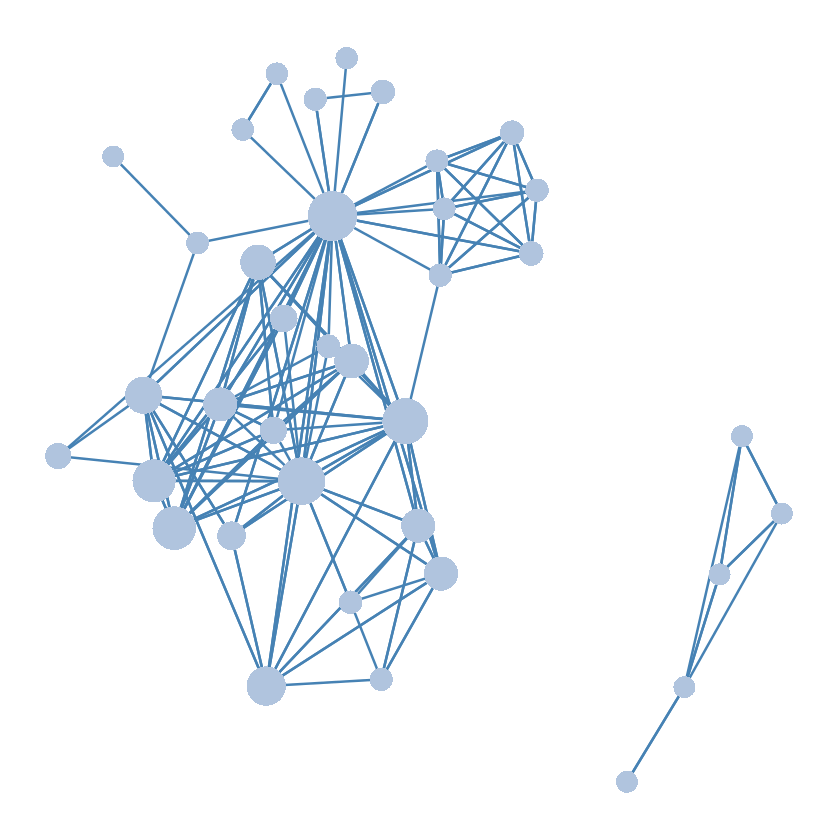

In [23]:
evCentr = igraph::evcent(hpig)
data.frame(
  eigenvectorCentr=tail(V(hpig)$name[order(evCentr$vec)]))
par(mar=rep(0.1,4),bg='white')
V(hpig)$size = 15*log(1.5+evCentr$vec)
plot(hpig,
     vertex.color='lightsteelblue',
     vertex.frame.color=NA,
     vertex.label=NA,
     edge.color='steelblue',
     edge.arrow.size=0,
     edge.width=2,
     layout=loList[[5]])

betweenness
1         George Weasley
2 Justin Finch-Fletchley
3       Hermione Granger
4        Ernie Macmillan
5         Ronald Weasley
6     Harry James Potter

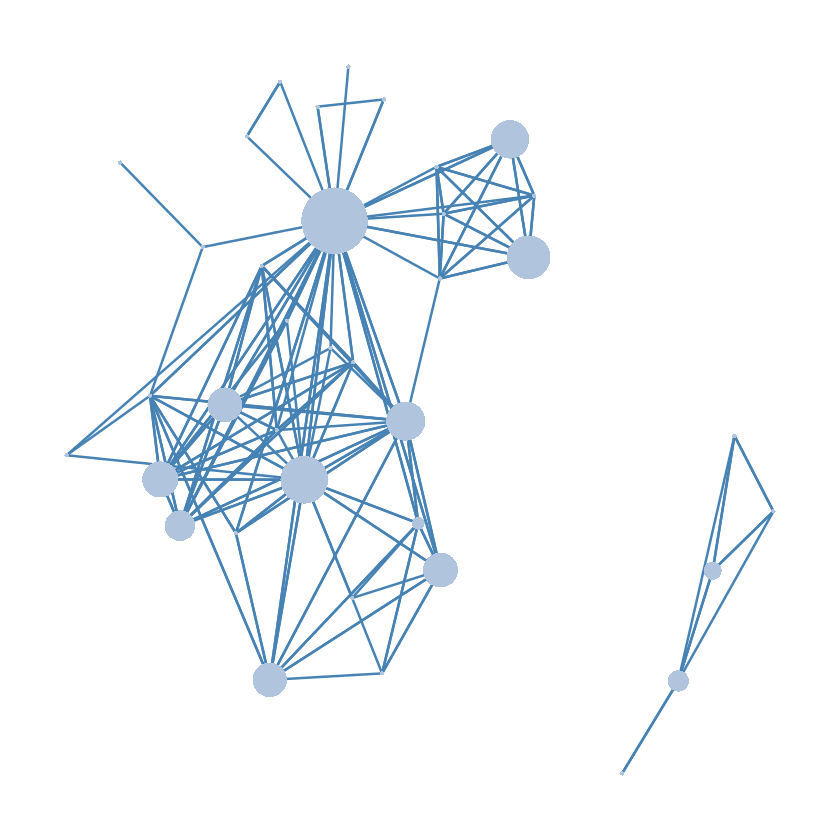

In [24]:
betwCentr = igraph::betweenness(hpig,weights=1/E(hpig)$weight)
data.frame(
  betweenness=tail(V(hpig)$name[order(betwCentr)]))

par(mar=rep(0.1,4),bg='white') 
V(hpig)$size = 3*log(1.5+betwCentr)
plot(hpig,
     vertex.color='lightsteelblue',
     vertex.frame.color=NA,
     vertex.label=NA,
     edge.color='steelblue',
     edge.arrow.size=0,
     edge.width=2,
     layout=loList[[5]])

In [25]:
hpigBin = hpig
E(hpigBin)$weight = 1
LCC_W = transitivity(as.undirected(hpig,'collapse'),type='barrat')
LCC_UW = transitivity(as.undirected(hpigBin,'collapse'),type='local')
data.frame(
  LCC_W=tail(V(hpig)$name[order(LCC_W)]),
  LCC_UW=tail(V(hpig)$name[order(LCC_UW)]))

LCC_W         LCC_UW
1  Percy Weasley  Percy Weasley
2    Susan Bones    Susan Bones
3 Vincent Crabbe Vincent Crabbe
4   Jimmy Peakes   Jimmy Peakes
5   Marcus Flint   Marcus Flint
6    Padma Patil    Padma Patil

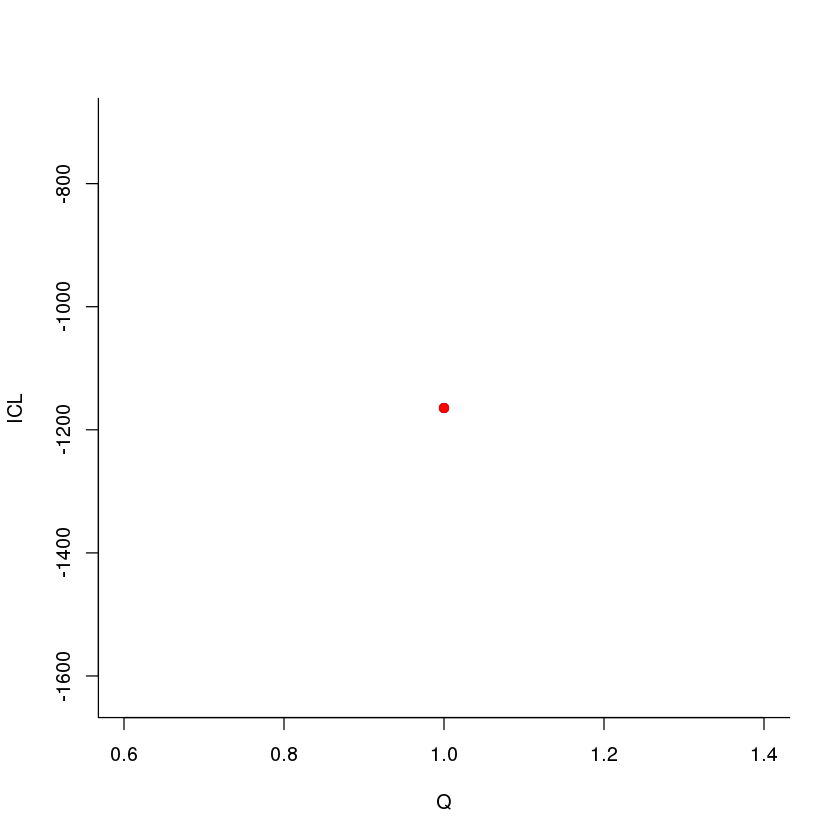

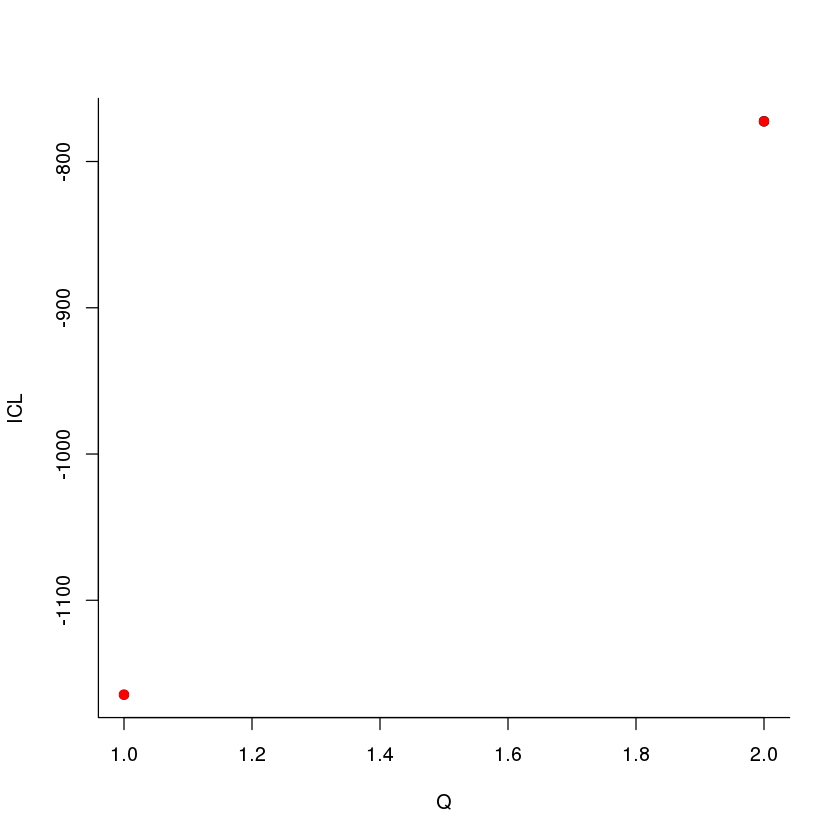

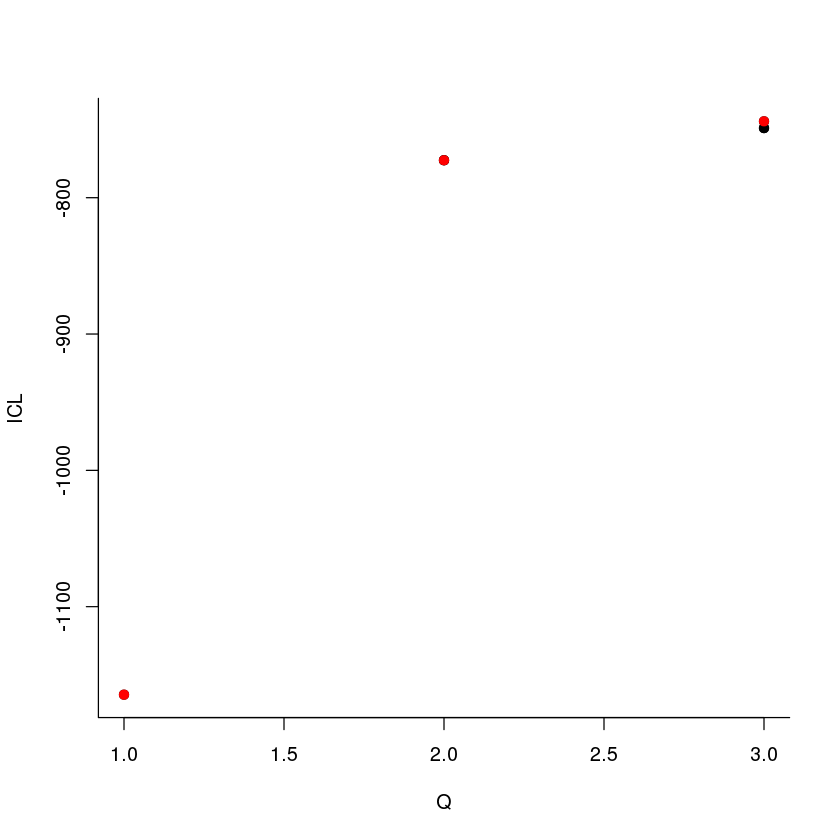

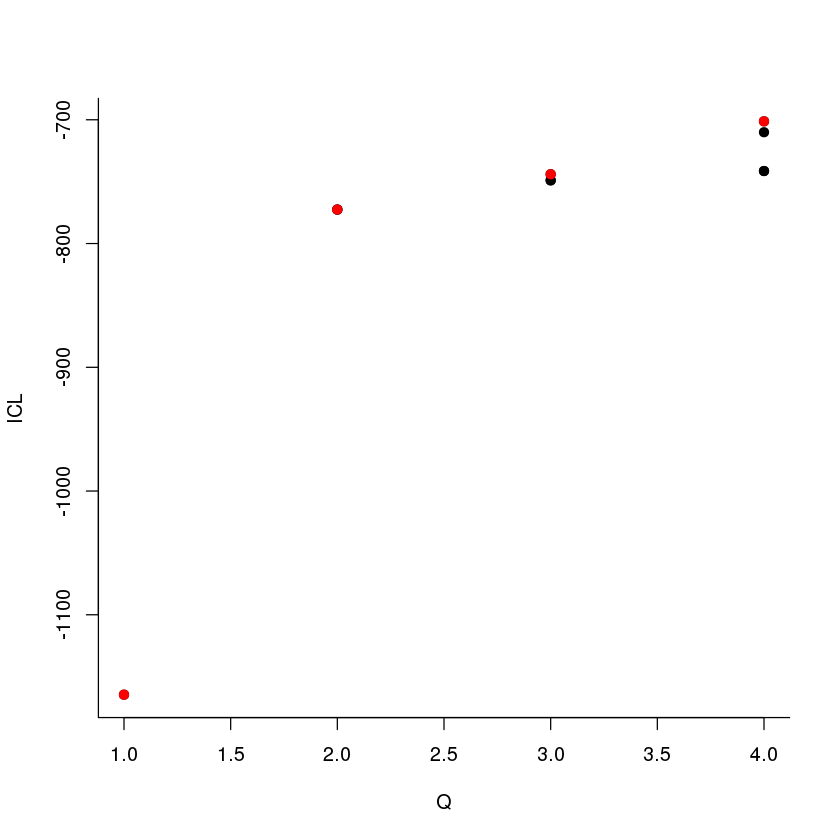

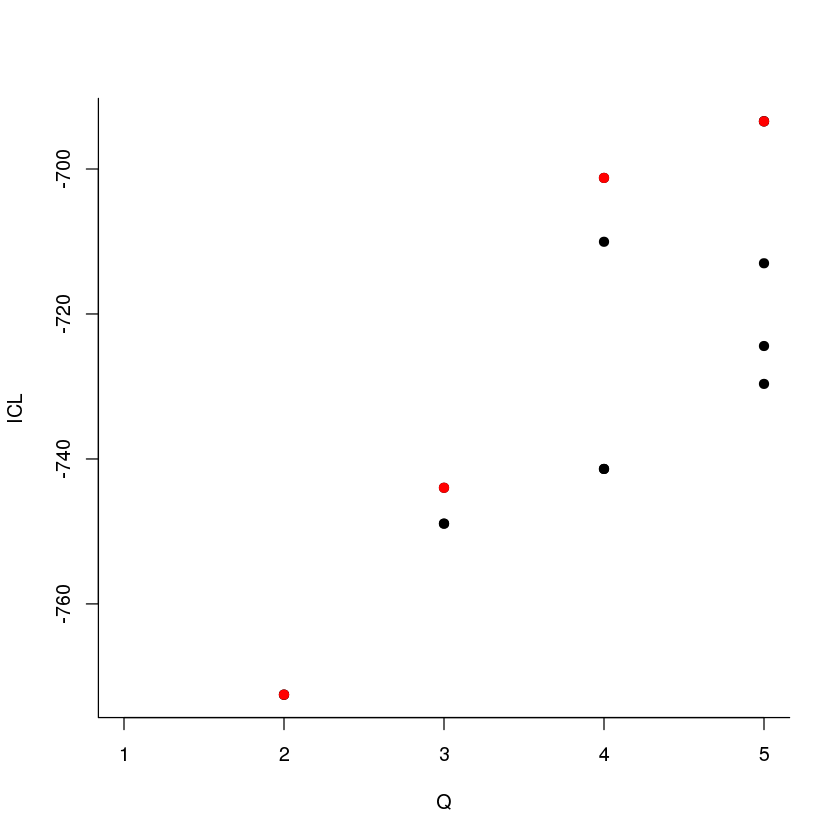

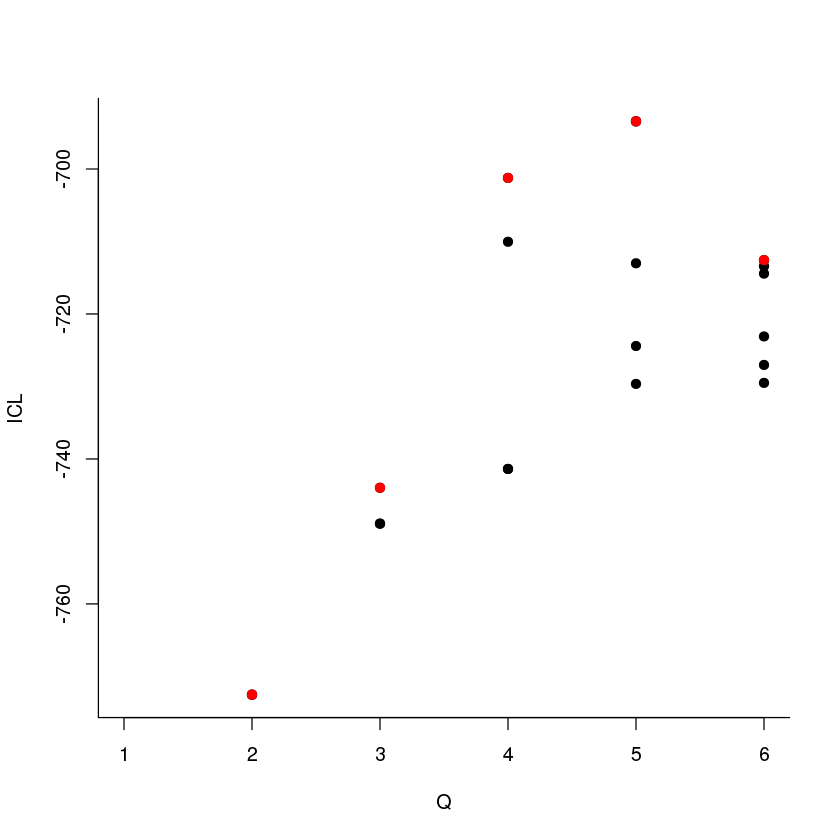

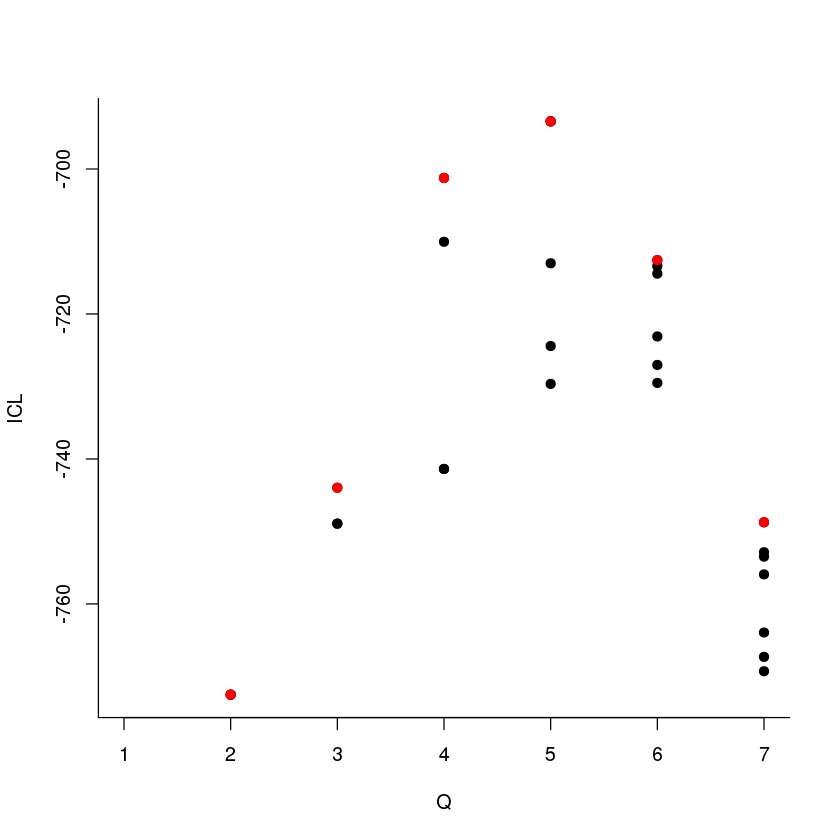

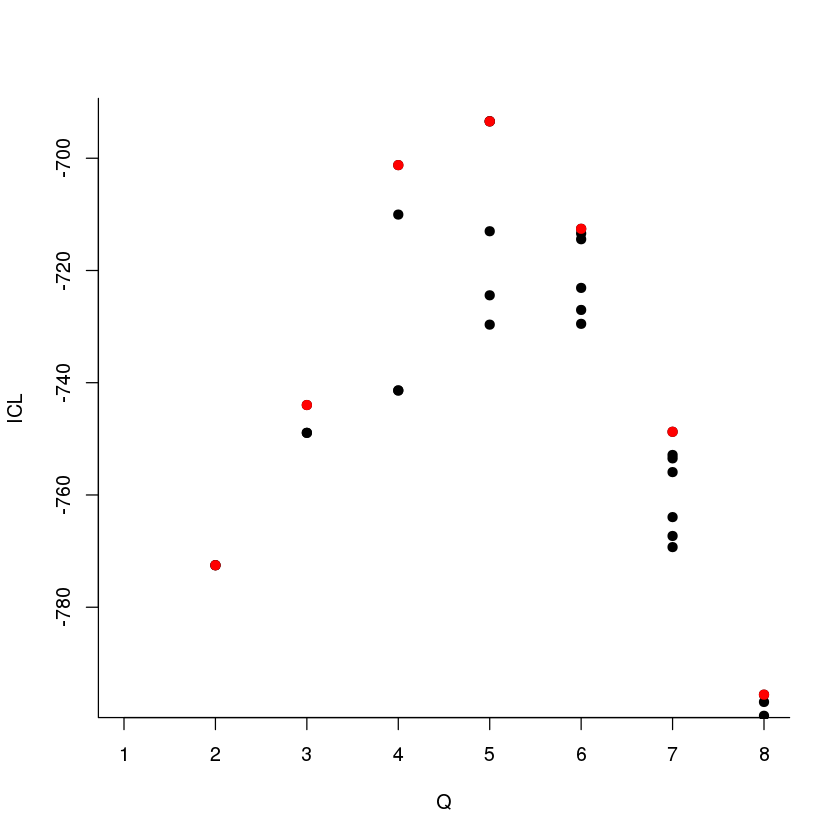

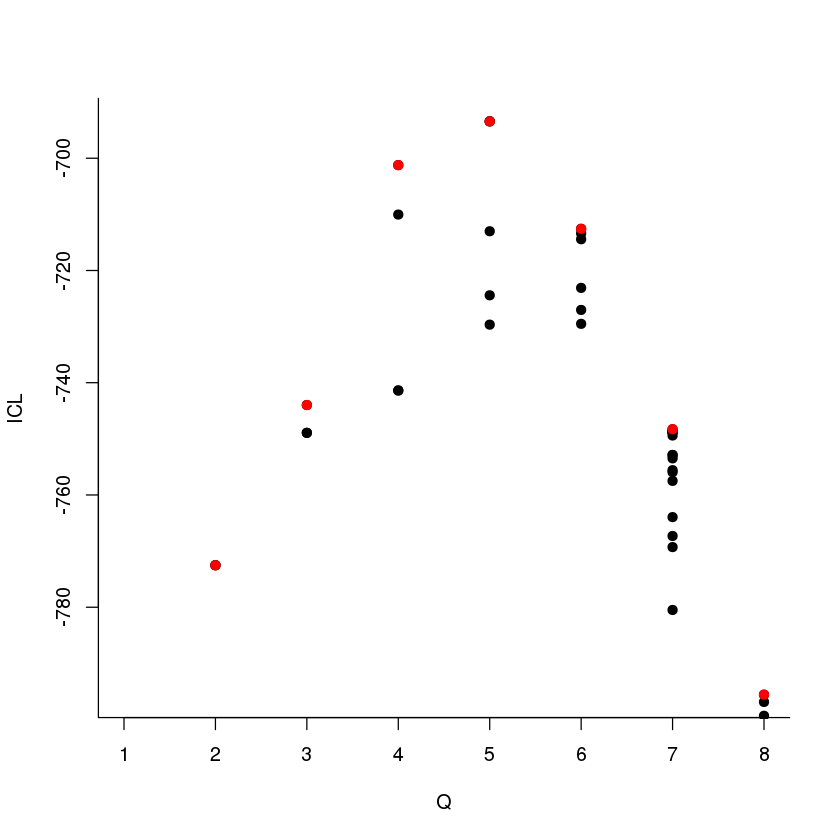

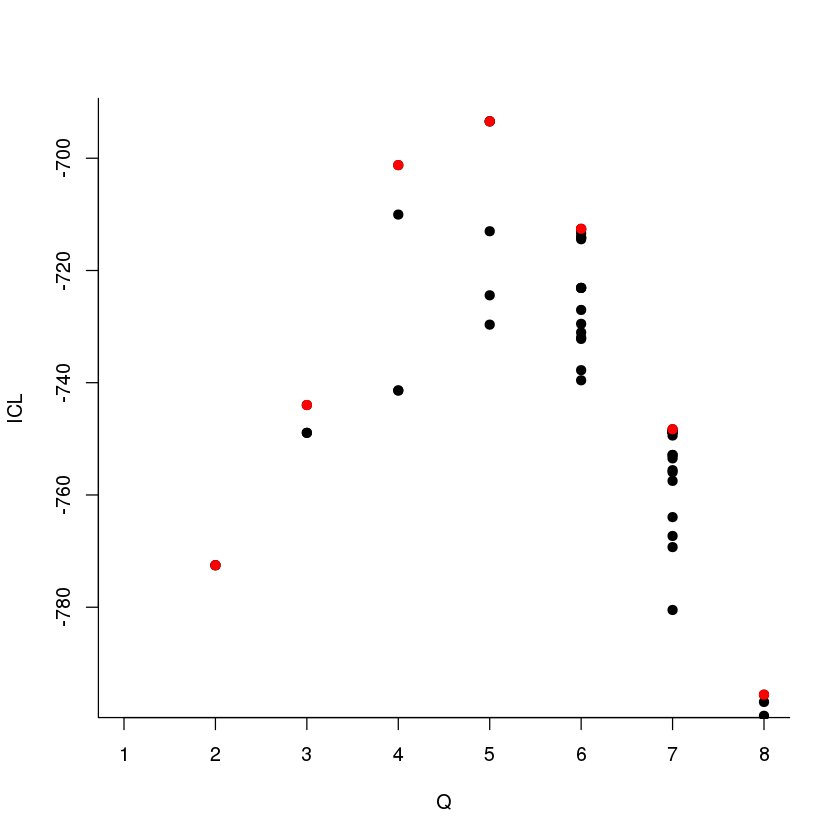

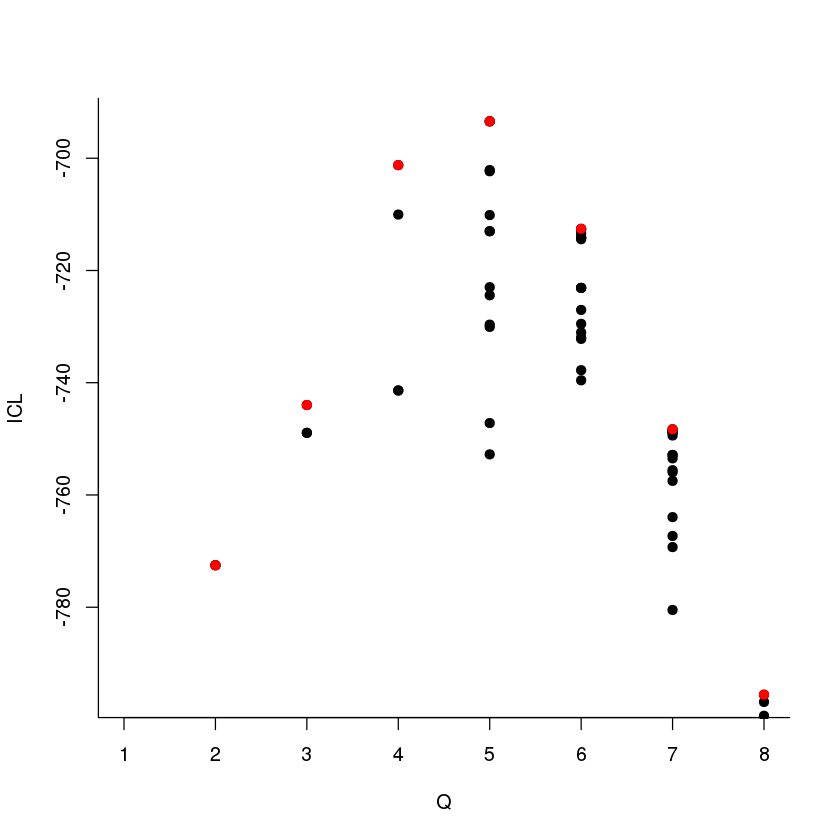

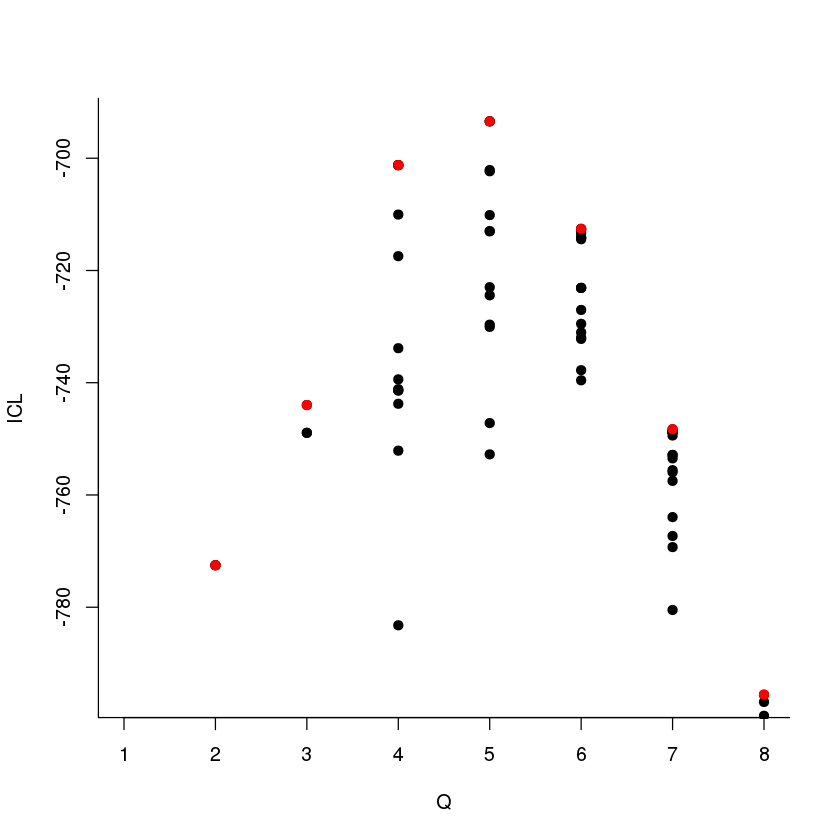

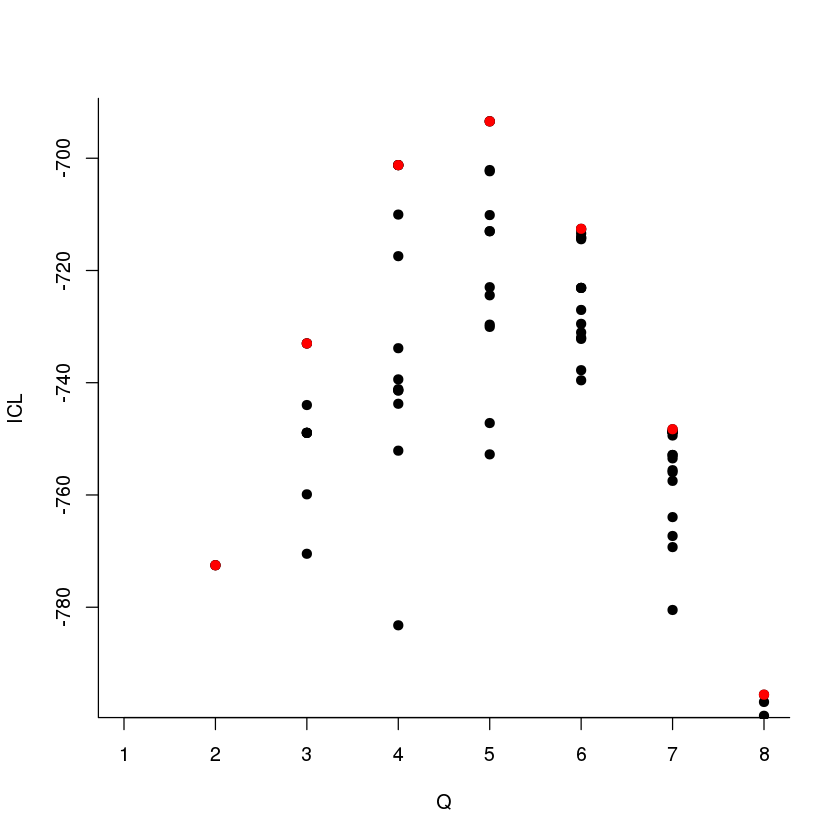

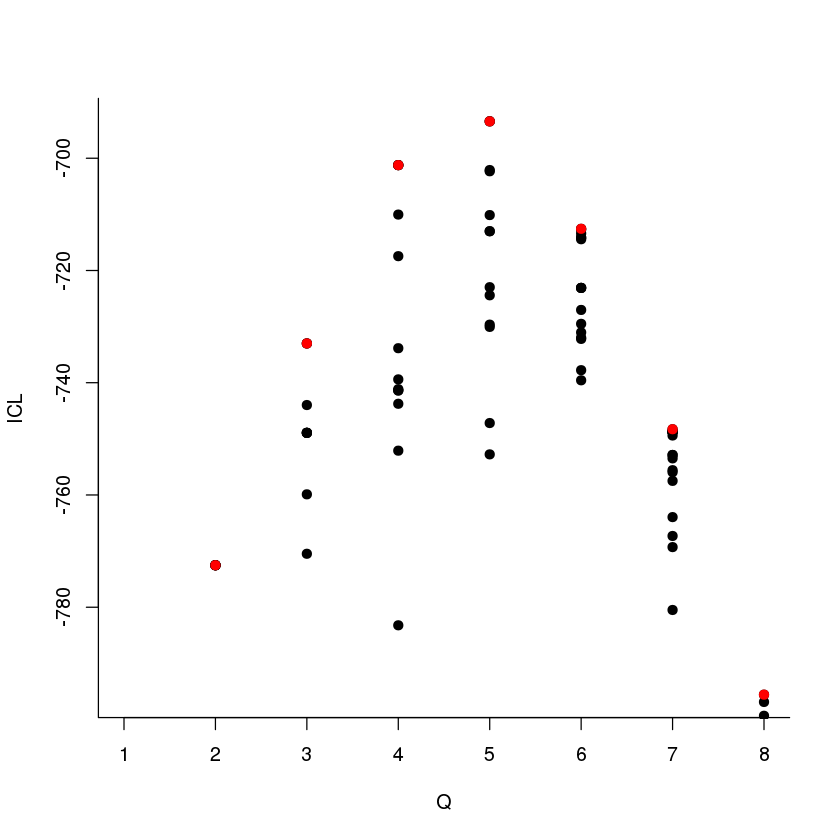

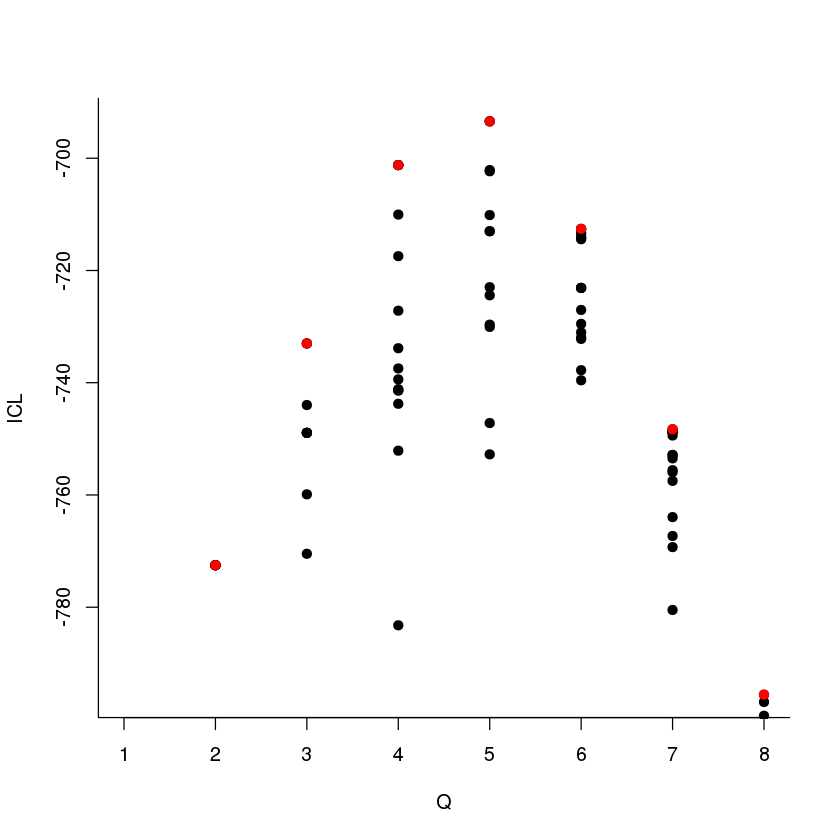

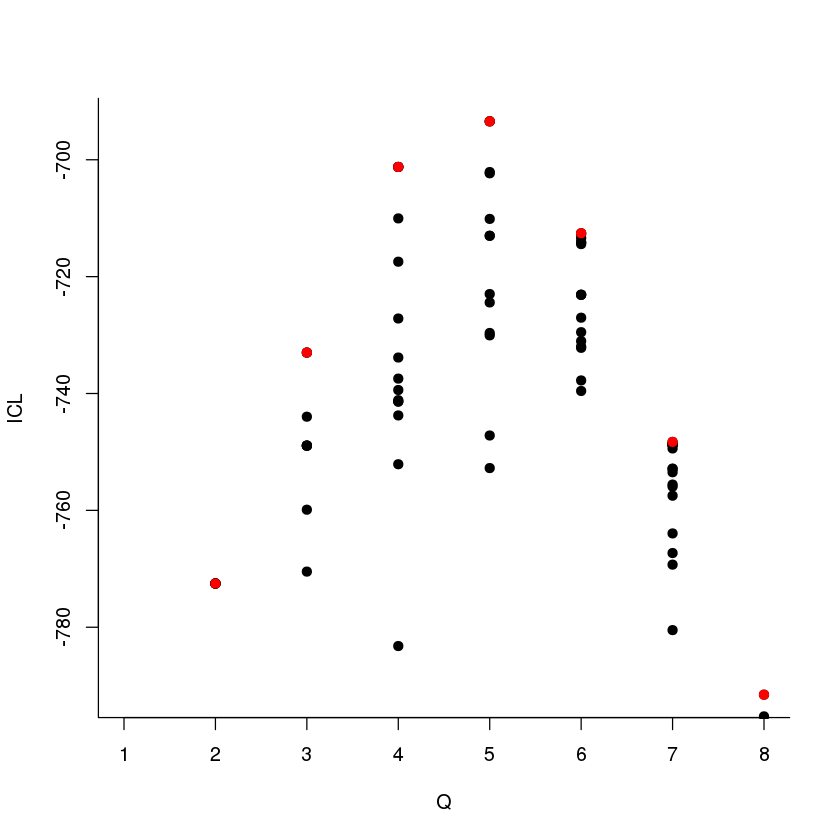

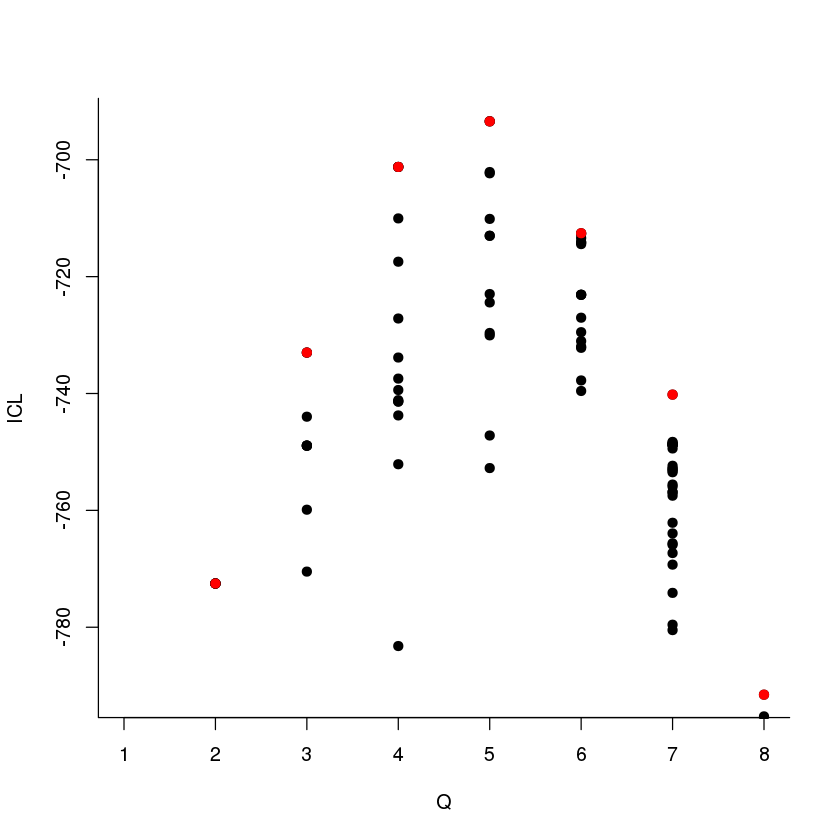

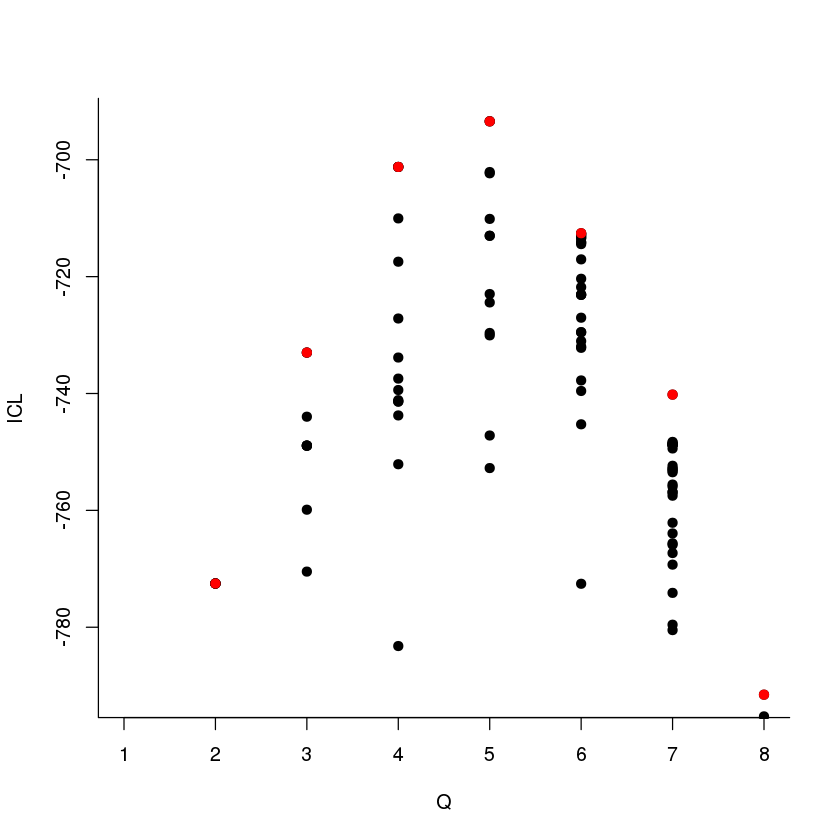

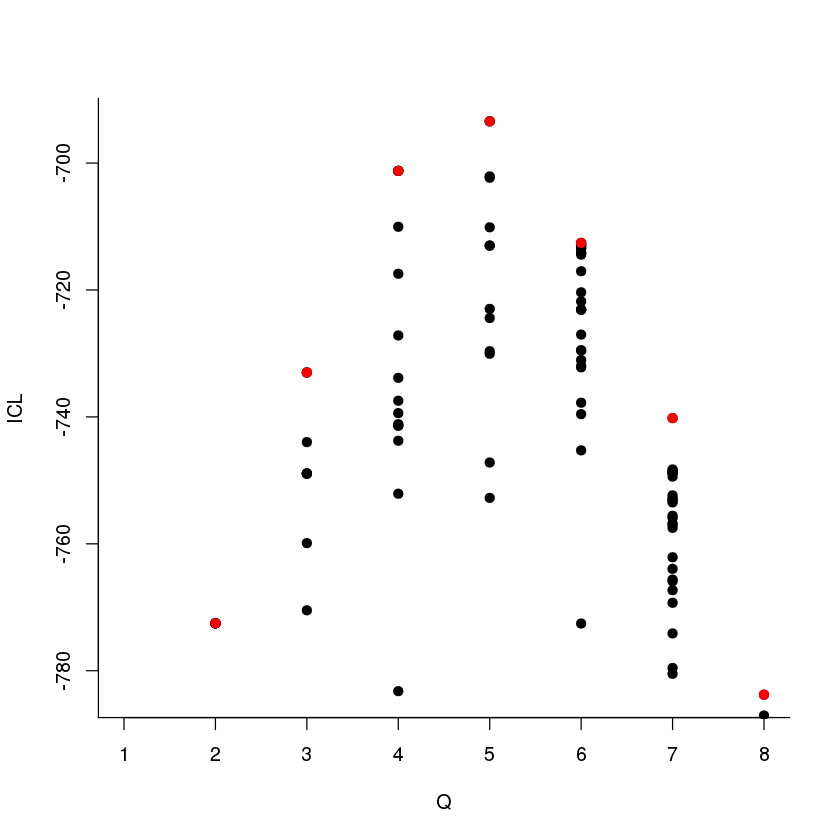

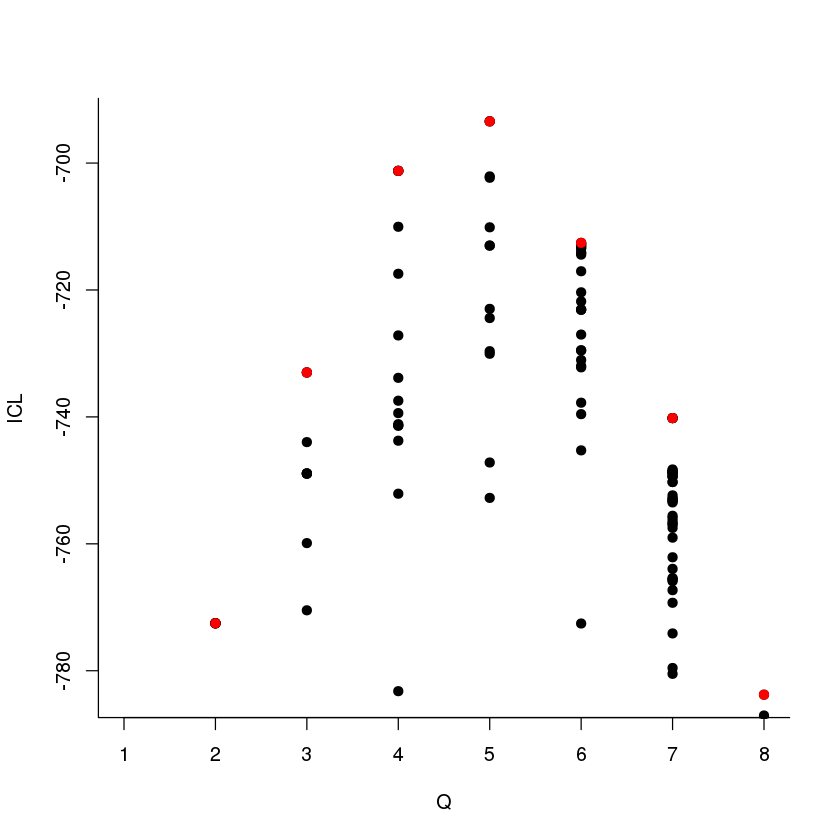

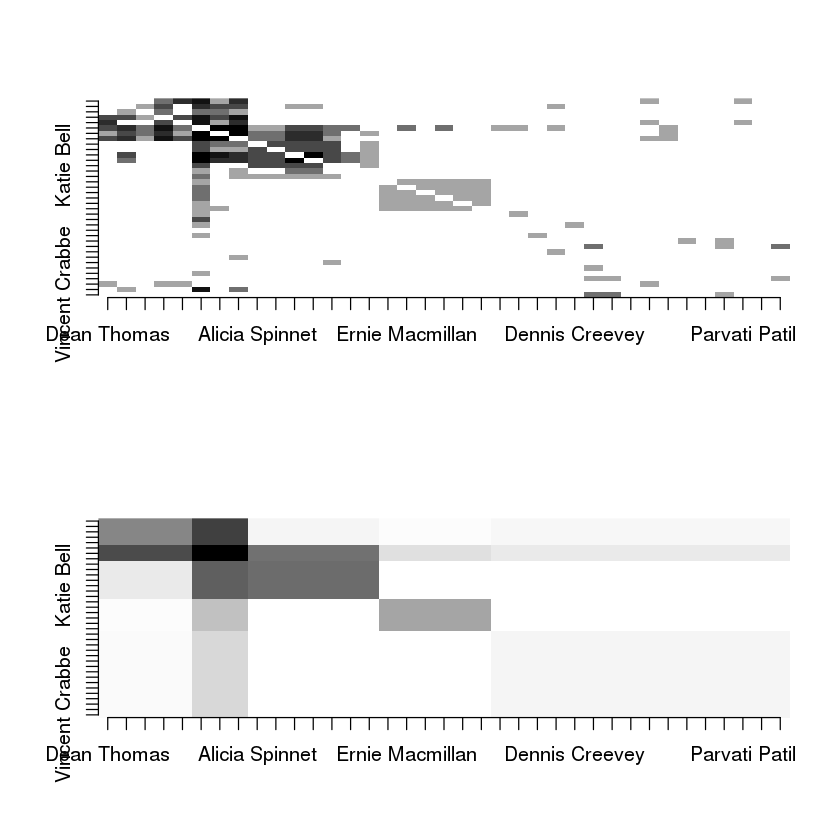

In [26]:
sbm1 = BM_poisson('SBM',hpWeighted,verbosity=0)
sbm1$estimate()

sbm1$plot_obs_pred(5)

In [27]:
Z = sbm1$memberships[[5]]$Z
Z = apply(Z,1,which.max)
by(V(hpig)$name,Z,function(x)x)

Z: 1
[1] Dean Thomas        Ginny Weasley      Luna Lovegood      Neville Longbottom
[5] Seamus Finnigan   
37 Levels: Alicia Spinnet Angelina Johnson Anthony Goldstein ... Vincent Crabbe
------------------------------------------------------------ 
Z: 2
[1] Harry James Potter Hermione Granger   Ronald Weasley    
37 Levels: Alicia Spinnet Angelina Johnson Anthony Goldstein ... Vincent Crabbe
------------------------------------------------------------ 
Z: 3
[1] Alicia Spinnet   Angelina Johnson Fred Weasley     George Weasley  
[5] Katie Bell       Lee Jordan       Oliver Wood     
37 Levels: Alicia Spinnet Angelina Johnson Anthony Goldstein ... Vincent Crabbe
------------------------------------------------------------ 
Z: 4
[1] Anthony Goldstein      Ernie Macmillan        Hannah Abbott         
[4] Justin Finch-Fletchley Susan Bones            Terry Boot            
37 Levels: Alicia Spinnet Angelina Johnson Anthony Goldstein ... Vincent Crabbe
-------------------------------------

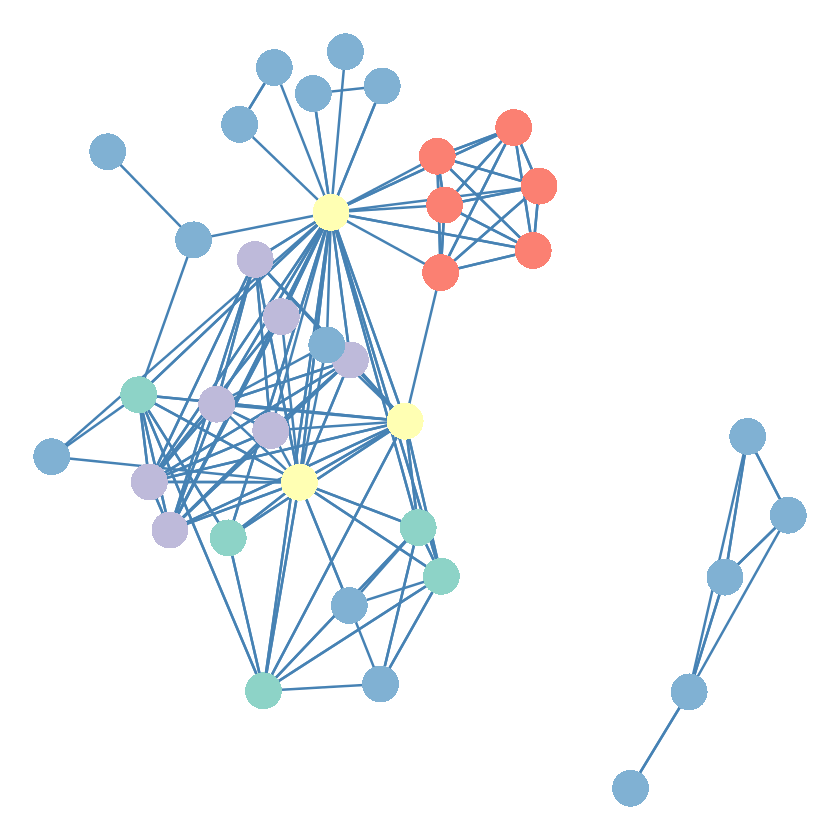

In [28]:
par(mar=rep(0.1,4),bg='white')
V(hpig)$size = 10
COLS = brewer.pal(5,'Set3')
plot(hpig,
     vertex.color=COLS[Z],
     vertex.frame.color=NA,
     vertex.label=NA,
     edge.color='steelblue',
     edge.arrow.size=0,
     edge.width=2,
     layout=loList[[5]])

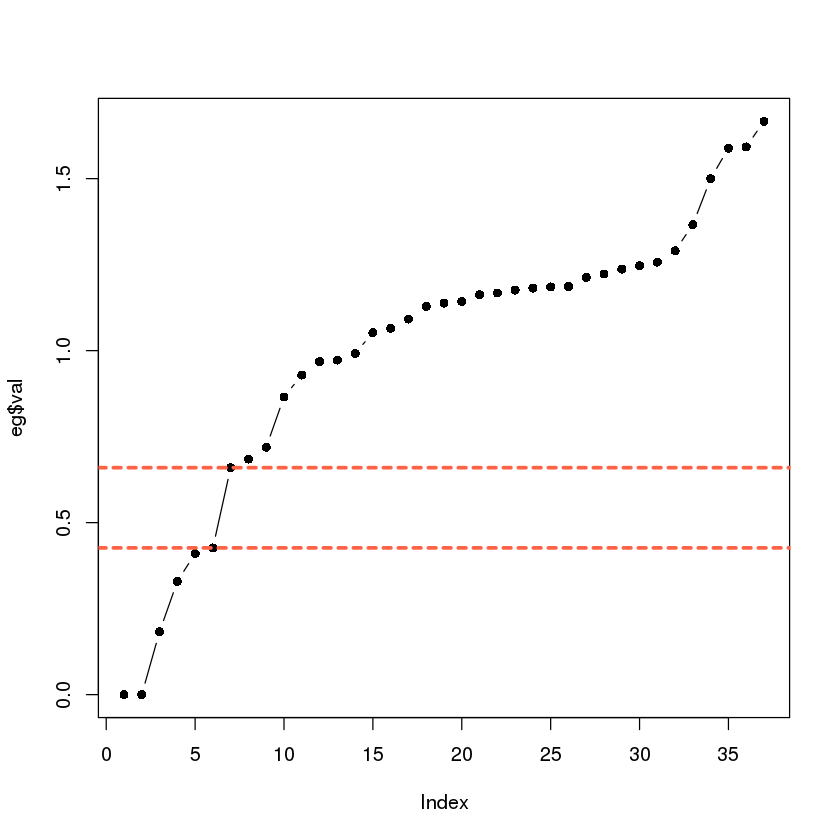

In [30]:
hpUndir = hpWeighted + t(hpWeighted)
DD = diag(rowSums(hpUndir))
LUnnorm = DD - hpUndir
DDInvSqrt = diag(sqrt(1/rowSums(hpUndir)))
DDInv = diag(1/rowSums(hpUndir))
LSym = DDInvSqrt%*%LUnnorm%*%DDInvSqrt
LRW = DDInv%*%LUnnorm
eg = eigen(LSym)
eg$vec = eg$vec[,nrow(hpUndir):1]
eg$val = eg$val[nrow(hpUndir):1]
km = list()
for(k in 2:10){
  km[[k]] = kmeans(eg$vec[,1:k],centers=k,nstart=100)
}
plot(eg$val,type='b',pch=16)
abline(h=eg$val[6:7],lty='22',col='tomato',lwd=3)

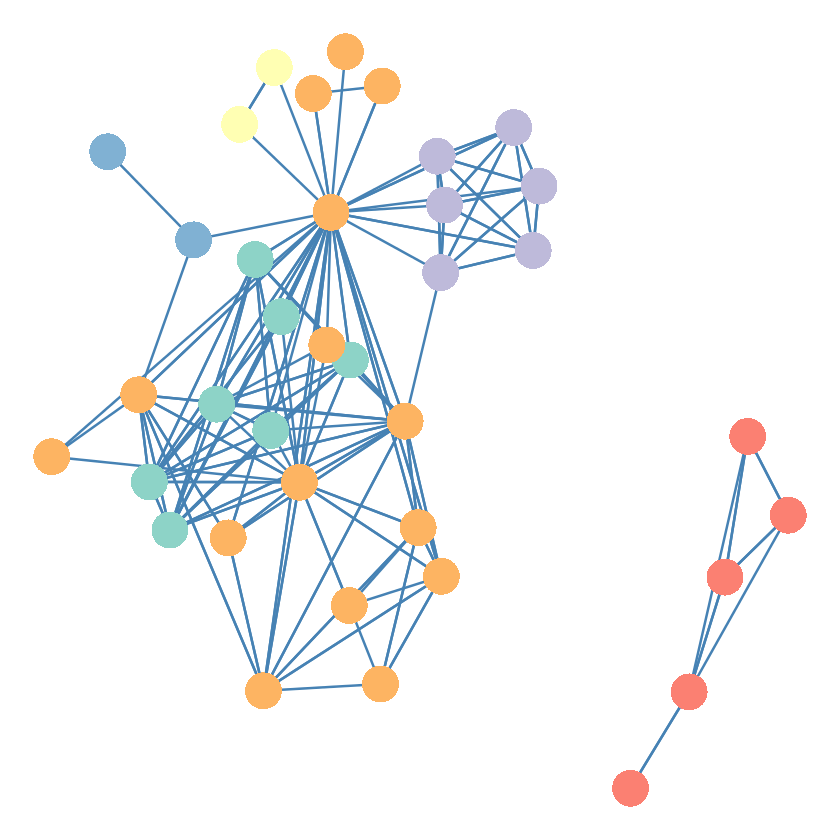

In [31]:
par(mar=rep(0.1,4),bg='white')
V(hpig)$size = 10
COLS = brewer.pal(10,'Set3')
plot(hpig,
     vertex.color=COLS[km[[6]]$cluster],
     vertex.frame.color=NA,
     vertex.label=NA,
     edge.color='steelblue',
     edge.arrow.size=0,
     edge.width=2,
     layout=loList[[5]])

In [32]:
ebc = edge.betweenness.community(hpig)
ebc$membership
by(V(hpig)$name,ebc$membership,function(x)x)

[1] 1 1 2 3 4 5 1 6 7 8 2 1 1 1 8 2 1 1 6 2 1 1 1 1 1 8 1 1 1 8 1 1 1 1 2 2 8

ebc$membership: 1
 [1] Alicia Spinnet     Angelina Johnson   Dean Thomas        Fred Weasley      
 [5] George Weasley     Ginny Weasley      Harry James Potter Hermione Granger  
 [9] Katie Bell         Lavender Brown     Leanne             Lee Jordan        
[13] Luna Lovegood      Neville Longbottom Oliver Wood        Padma Patil       
[17] Parvati Patil      Percy Weasley      Ronald Weasley     Seamus Finnigan   
37 Levels: Alicia Spinnet Angelina Johnson Anthony Goldstein ... Vincent Crabbe
------------------------------------------------------------ 
ebc$membership: 2
[1] Anthony Goldstein      Ernie Macmillan        Hannah Abbott         
[4] Justin Finch-Fletchley Susan Bones            Terry Boot            
37 Levels: Alicia Spinnet Angelina Johnson Anthony Goldstein ... Vincent Crabbe
------------------------------------------------------------ 
ebc$membership: 3
[1] Cedric Diggory
37 Levels: Alicia Spinnet Angelina Johnson Anthony Goldstein ... Vincent Crabbe
------------

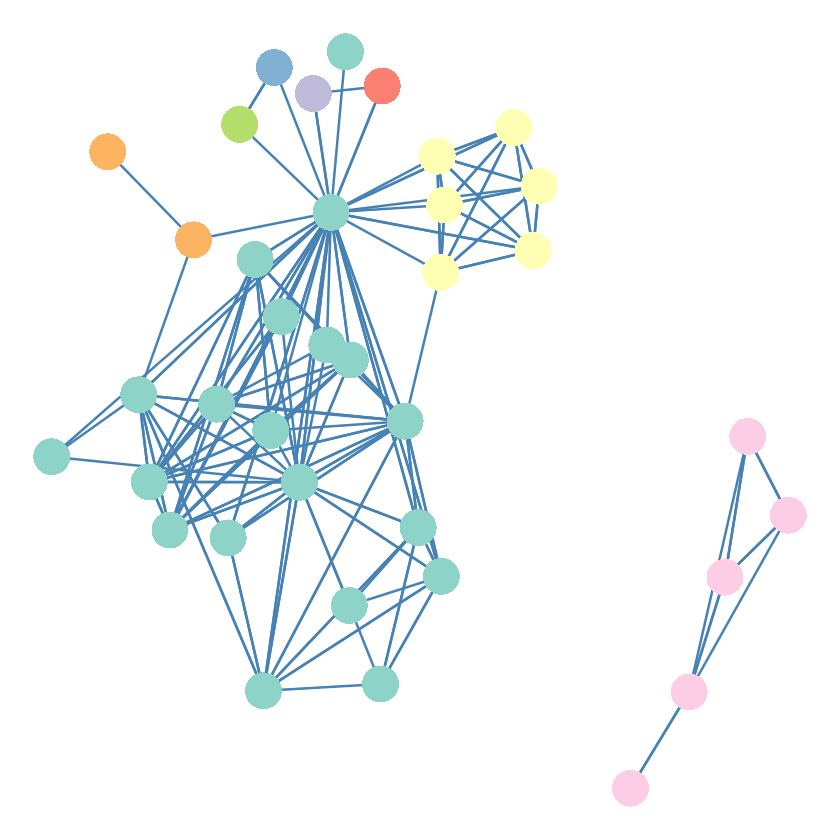

In [33]:
par(mar=rep(0.1,4),bg='white')
V(hpig)$size = 10
COLS = brewer.pal(10,'Set3')
plot(hpig,
     vertex.color=COLS[ebc$membership],
     vertex.frame.color=NA,
     vertex.label=NA,
     edge.color='steelblue',
     edge.arrow.size=0,
     edge.width=2,
     layout=loList[[5]])

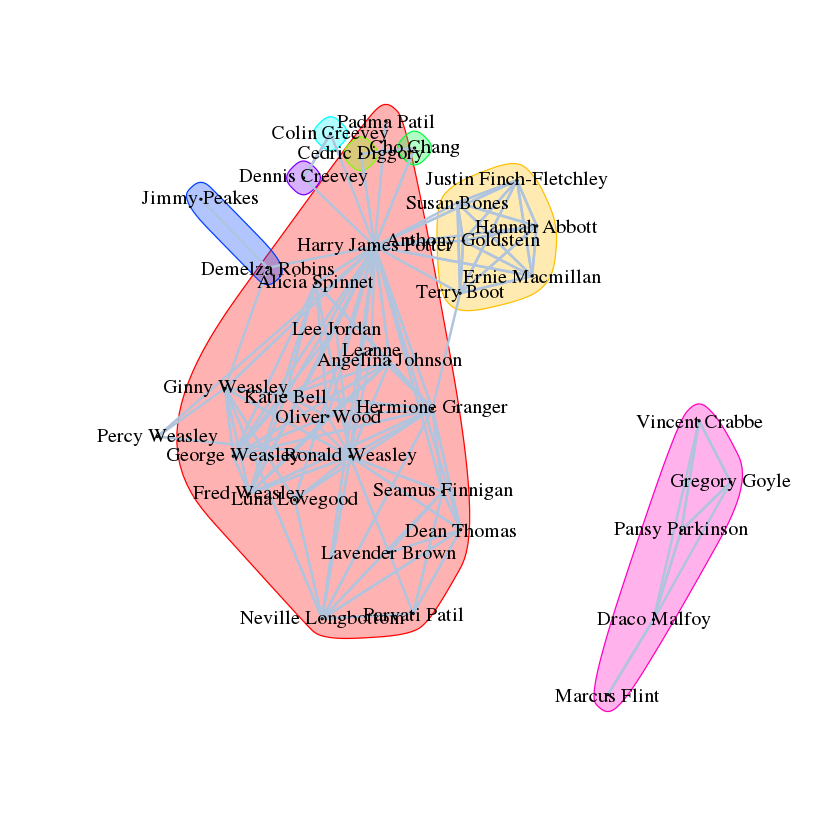

In [34]:
plot(ebc,hpig,vertex.size=0,
      vertex.label.color='black',
      edge.color='lightsteelblue',
      edge.arrow.size=0,
      edge.width=2,
     layout=loList[[5]])

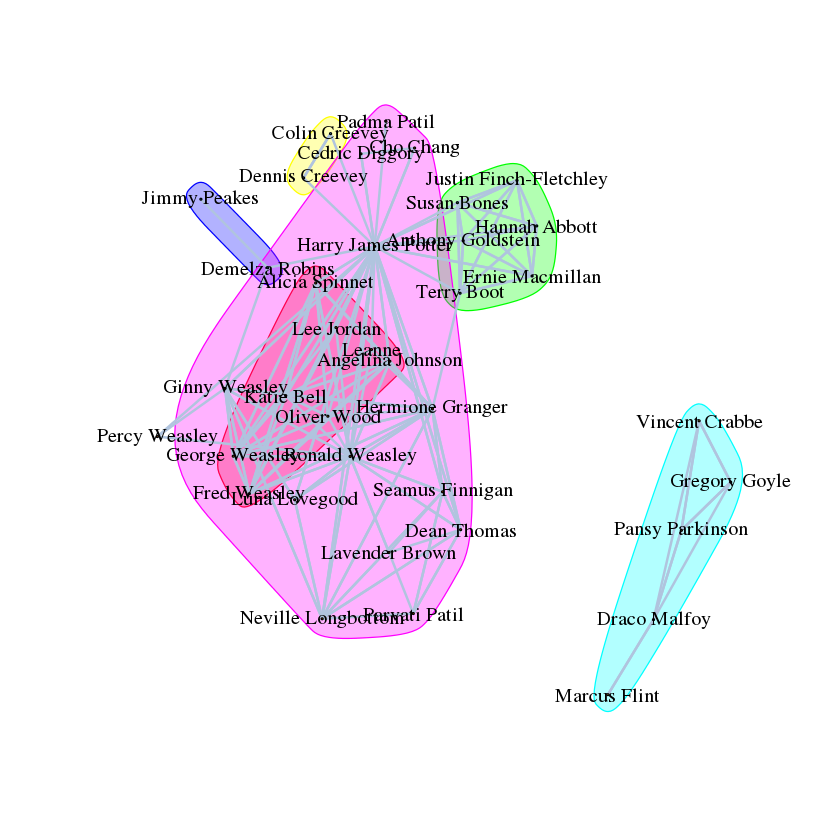

In [35]:
temp = list(membership=km[[6]]$cluster)
class(temp) = 'communities'
plot(temp,hpig,vertex.size=0,
      vertex.label.color='black',
      edge.color='lightsteelblue',
      edge.arrow.size=0,
      edge.width=2,
     layout=loList[[5]])


Univariate Conditional Uniform Graph Test

Conditioning Method: size 
Graph Type: digraph 
Diagonal Used: FALSE 
Replications: 1000 

Observed Value: 0.563389 
Pr(X>=Obs): 0 
Pr(X<=Obs): 1 


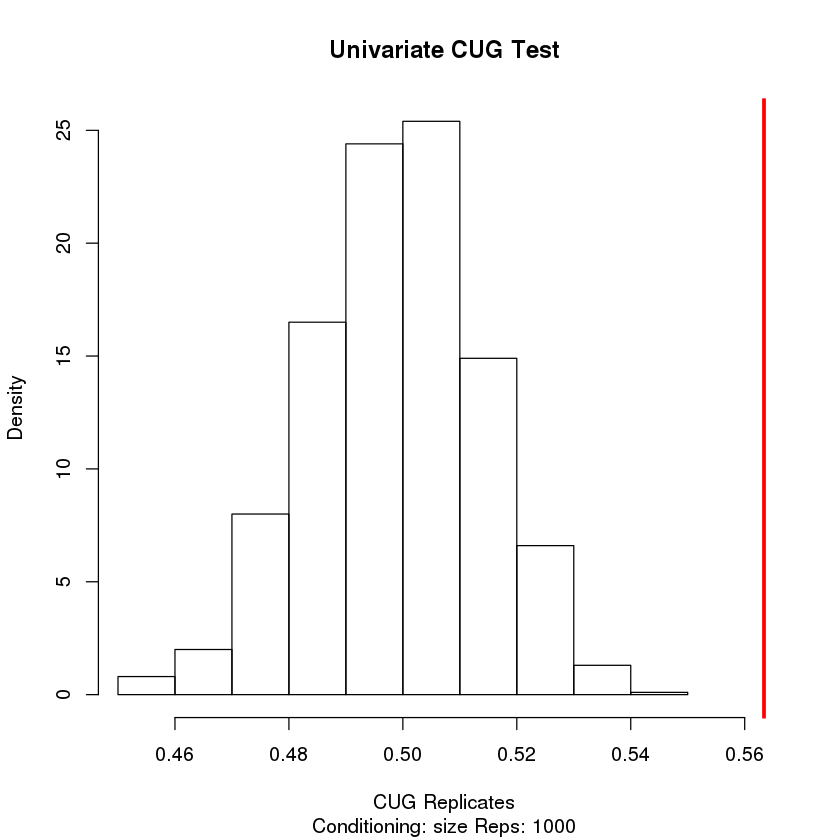

In [36]:
hpBin = as.matrix(as_adj(hpigBin))
( test = cug.test(hpBin, gtrans, mode="digraph", cmode="size", reps=1000) )
plot(test)


Univariate Conditional Uniform Graph Test

Conditioning Method: edges 
Graph Type: digraph 
Diagonal Used: FALSE 
Replications: 1000 

Observed Value: 78 
Pr(X>=Obs): 0 
Pr(X<=Obs): 1 


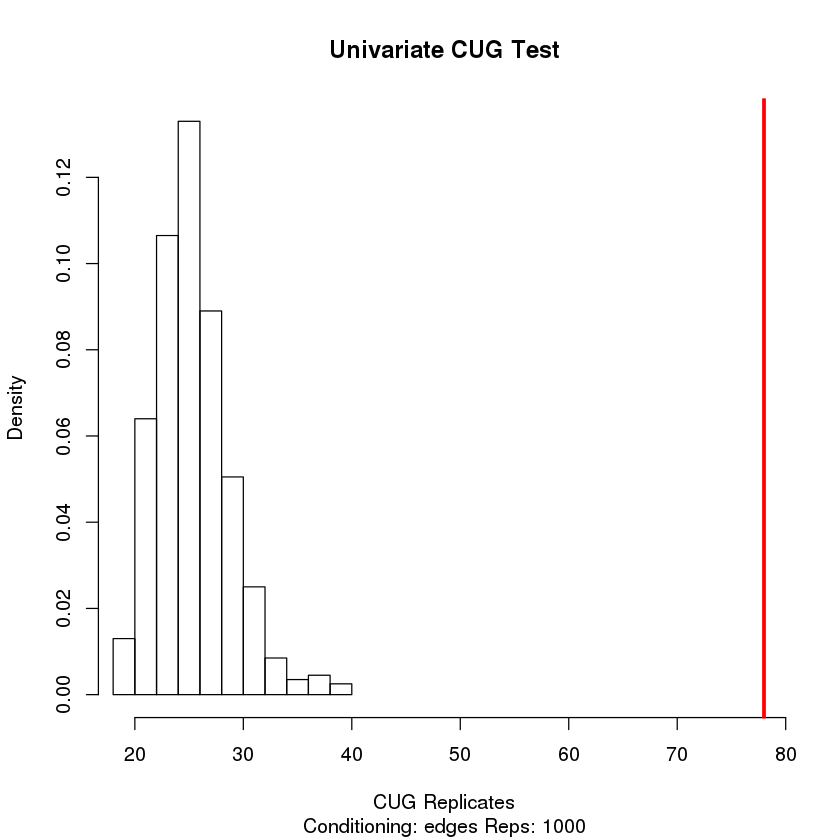

In [37]:
( test = cug.test(hpWeighted, function(x) max(colSums(x)), mode="digraph", cmode="edges", reps=1000,
                  ignore.eval=FALSE) )

plot(test)


Univariate Conditional Uniform Graph Test

Conditioning Method: edges 
Graph Type: digraph 
Diagonal Used: FALSE 
Replications: 1000 

Observed Value: 0.3873457 
Pr(X>=Obs): 0 
Pr(X<=Obs): 1 


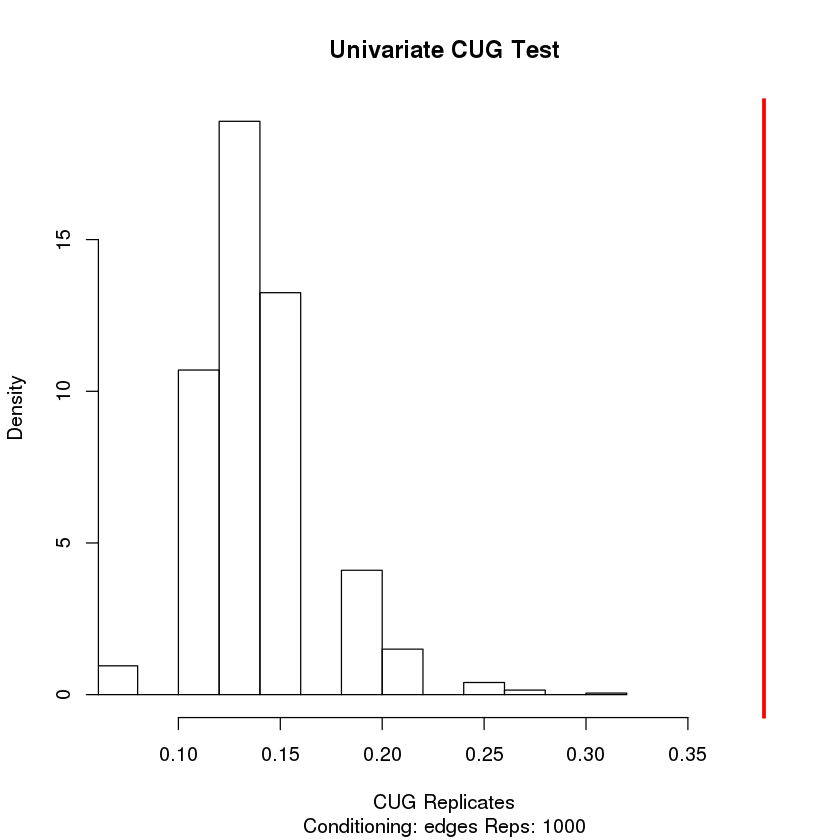

In [38]:
( test = cug.test(hpBin, sna::centralization, mode="digraph", cmode="edges", reps=1000,
                  FUN.args=list(FUN=sna::degree,cmode='outdegree')) )

plot(test)

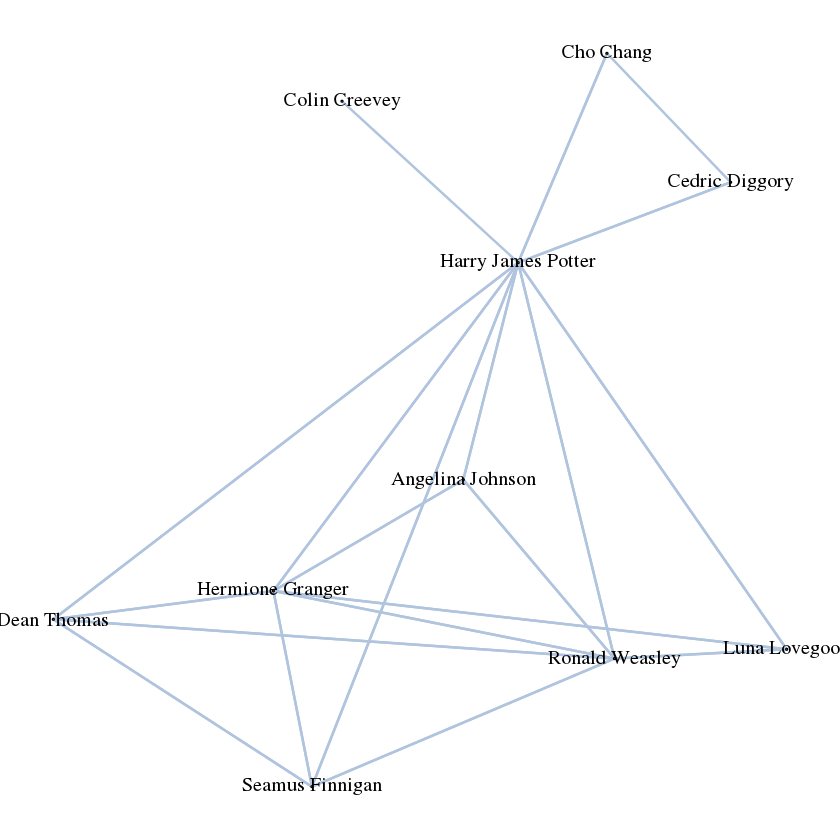

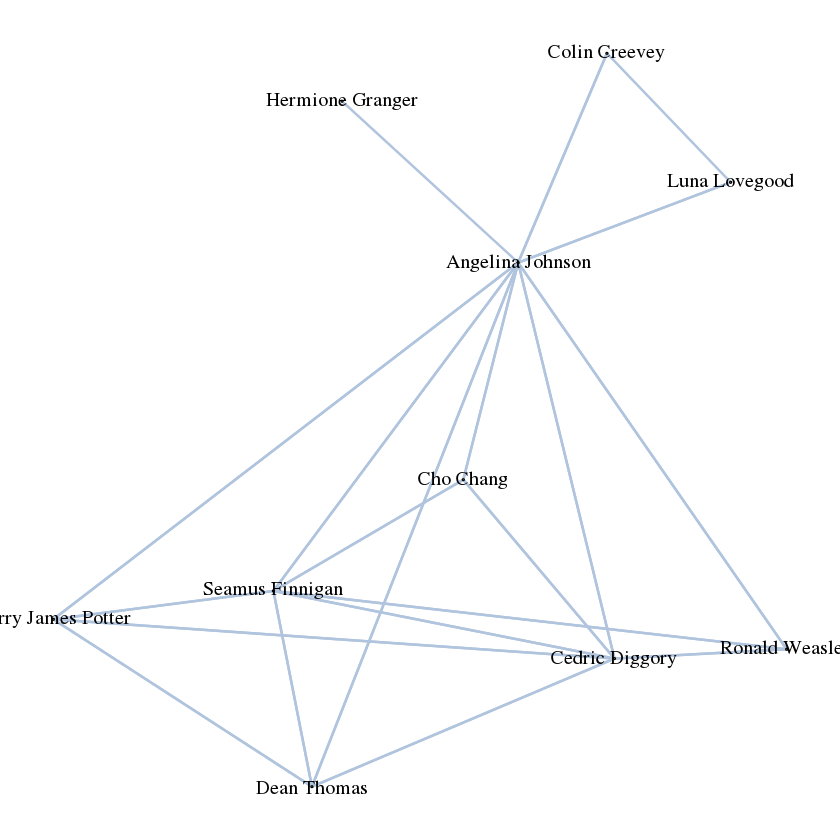

In [40]:
hpigEx = induced_subgraph(hpig,vids=c(2,4,5,6,7,17,18,25,33,34))
set.seed(1)
loEx = layout_with_kk(hpigEx)
par(mar=rep(1,4))
plot(hpigEx,
     vertex.size=0,
     vertex.label.color='black',
     edge.color='lightsteelblue',
     edge.arrow.size=0,
     edge.width=2,
     layout=loEx)

set.seed(123)
V(hpigEx)$name = V(hpigEx)$name[sample(vcount(hpigEx))]
plot(hpigEx,
     vertex.size=0,
     vertex.label.color='black',
     edge.color='lightsteelblue',
     edge.arrow.size=0,
     edge.width=2,
     layout=loEx)

In [41]:
bk1 <- as.matrix(read.table("http://myweb.uiowa.edu/dksewell/hpbook1.txt"))
diag(bk1)=0
colnames(bk1) = rownames(bk1) = hpnames
bk5 <- as.matrix(read.table("http://myweb.uiowa.edu/dksewell/hpbook5.txt"))
diag(bk5)=0
colnames(bk5) = rownames(bk5) = hpnames

## ------------------------------------------------------------------------
( qap1 = qaptest(list(bk6, bk1), gcor, g1=1, g2=2, reps=1000) )
( qap2 = qaptest(list(bk6, bk5), gcor, g1=1, g2=2, reps=1000) )



QAP Test Results

Estimated p-values:
	p(f(perm) >= f(d)): 0 
	p(f(perm) <= f(d)): 1 



QAP Test Results

Estimated p-values:
	p(f(perm) >= f(d)): 0 
	p(f(perm) <= f(d)): 1 


In [42]:
n = nrow(bk1)
Noise = matrix(rnorm(n^2),n,n);diag(Noise)=0
mrqap1 = netlm(bk6,list(bk1,bk5,Noise),nullhyp='qapspp')
mrqap2 = netlogit(bk6,list(bk1,bk5,Noise),nullhyp='qapspp')

print(mrqap1)

print(mrqap2)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


OLS Network Model

Coefficients:
            Estimate    Pr(<=b) Pr(>=b) Pr(>=|b|)
(intercept) 0.001948717 0.457   0.543   0.543    
x1          0.501036329 1.000   0.000   0.000    
x2          0.204641679 1.000   0.000   0.000    
x3          0.000868198 0.727   0.273   0.541    

Residual standard error: 0.09227 on 4028 degrees of freedom
F-statistic:   705 on 3 and 4028 degrees of freedom, p-value:     0 
Multiple R-squared: 0.3443 	Adjusted R-squared: 0.3438 


Network Logit Model

Coefficients:
            Estimate   Exp(b)       Pr(<=b) Pr(>=b) Pr(>=|b|)
(intercept) -5.7799431  0.003088891 1.000   0.000   1.000    
x1           4.5479262 94.436364864 1.000   0.000   0.000    
x2           4.1565185 63.848847377 1.000   0.000   0.000    
x3           0.1456917  1.156839501 0.781   0.219   0.436    

Goodness of Fit Statistics:

Null deviance: 5589.539 on 4032 degrees of freedom
Residual deviance: 291.0466 on 4028 degrees of freedom
Chi-Squared test of fit improvement:
	 5298.492

In [45]:
X1 = with(hp.attributes,
          outer(schoolyear,schoolyear,function(x,y) abs(x-y)))
X2 = with(hp.attributes,
          outer(gender,gender,function(x,y) 1.0*(x==y)))
X3 = with(hp.attributes,
          outer(house,house,function(x,y) 1.0*(x==y)))
X3 = with(hp.attributes,
          outer(house,house,function(x,y) 1.0*(x==4 & y==4)))
#X3 = both slytherin
mrqap3 = netlogit(bk6,list(X1,X2,X3),nullhyp='qapspp')

print(mrqap3)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Network Logit Model

Coefficients:
            Estimate   Exp(b)     Pr(<=b) Pr(>=b) Pr(>=|b|)
(intercept) -3.3968775 0.03347764 0.000   1.000   0.000    
x1          -0.8989833 0.40698323 0.000   1.000   0.002    
x2           0.3296147 1.39043226 0.785   0.215   0.463    
x3           0.3654103 1.44110510 0.732   0.268   0.724    

Goodness of Fit Statistics:

Null deviance: 5589.539 on 4032 degrees of freedom
Residual deviance: 499.4514 on 4028 degrees of freedom
Chi-Squared test of fit improvement:
	 5090.087 on 4 degrees of freedom, p-value 0 
AIC: 507.4514 	BIC: 532.6595 
Pseudo-R^2 Measures:
	(Dn-Dr)/(Dn-Dr+dfn): 0.5579959 
	(Dn-Dr)/Dn: 0.9106453 



In [46]:
X1.1 = X1[-ind2rm,-ind2rm]
X2.1 = X2[-ind2rm,-ind2rm]
X3.1 = X3[-ind2rm,-ind2rm]
mrqap4 = netlm(hpWeighted,list(X1.1,X2.1,X3.1),nullhyp='qapspp')

print(mrqap4)


OLS Network Model

Coefficients:
            Estimate    Pr(<=b) Pr(>=b) Pr(>=|b|)
(intercept)  0.48107008 1.000   0.000   0.000    
x1          -0.11159682 0.002   0.998   0.016    
x2           0.06456964 0.851   0.149   0.340    
x3           0.50338177 0.900   0.100   0.101    

Residual standard error: 0.9376 on 1328 degrees of freedom
F-statistic: 19.42 on 3 and 1328 degrees of freedom, p-value: 2.525e-12 
Multiple R-squared: 0.04202 	Adjusted R-squared: 0.03986 



In [47]:
library(ergm)

hpBinNet = asNetwork(hpigBin)
spec0 <- ergm(hpBinNet~edges+nodematch("house")+
                nodematch("gender")+
                absdiff("schoolyear"))
#edges are like the intercept. they go in every model
summary(spec0)$coef

Evaluating log-likelihood at the estimate. 


Estimate Std. Error MCMC %      p-value
edges              -2.19212673 0.18493087      0 6.977991e-31
nodematch.house     2.62853709 0.20028658      0 4.378347e-37
nodematch.gender    0.08326894 0.17825731      0 6.404851e-01
absdiff.schoolyear -0.75700346 0.07894469      0 4.210391e-21

In [48]:
spec1 <- ergm(hpBinNet~edges+
                mutual + 
                gwesp +
                #transitive +
                nodematch("house")+
                nodematch("gender")+
                absdiff("schoolyear"),
              estimate="MLE")
summary(spec1)$coef

Starting maximum likelihood estimation via MCMLE:
Iteration 1 of at most 20: 
The log-likelihood improved by 4.819 
Iteration 2 of at most 20: 
The log-likelihood improved by 3.286 
Iteration 3 of at most 20: 
The log-likelihood improved by 3.189 
Iteration 4 of at most 20: 
The log-likelihood improved by 2.569 
Iteration 5 of at most 20: 
The log-likelihood improved by 0.4861 
Step length converged once. Increasing MCMC sample size.
Iteration 6 of at most 20: 
The log-likelihood improved by 0.4313 
Step length converged twice. Stopping.
Evaluating log-likelihood at the estimate. Using 20 bridges: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 .

This model was fit using MCMC.  To examine model diagnostics and check for degeneracy, use the mcmc.diagnostics() function.


Estimate Std. Error MCMC %      p-value
edges              -4.48913759 0.27751636      0 7.528267e-54
mutual              3.88501858 0.41620445      0 4.136156e-20
gwesp               0.64592706 0.11308085      0 1.376316e-08
gwesp.decay         0.93830295 0.05885410      0 1.752655e-52
nodematch.house     0.82801828 0.13298182      1 6.387900e-10
nodematch.gender    0.06918295 0.15345690      0 6.521860e-01
absdiff.schoolyear -0.31527389 0.05468718      0 1.014456e-08

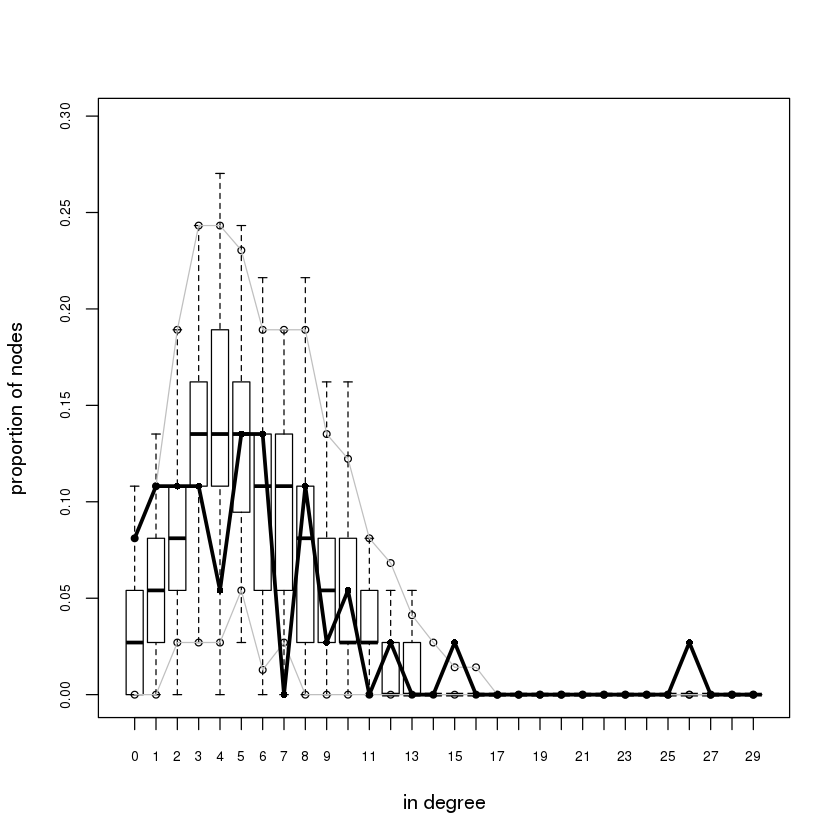

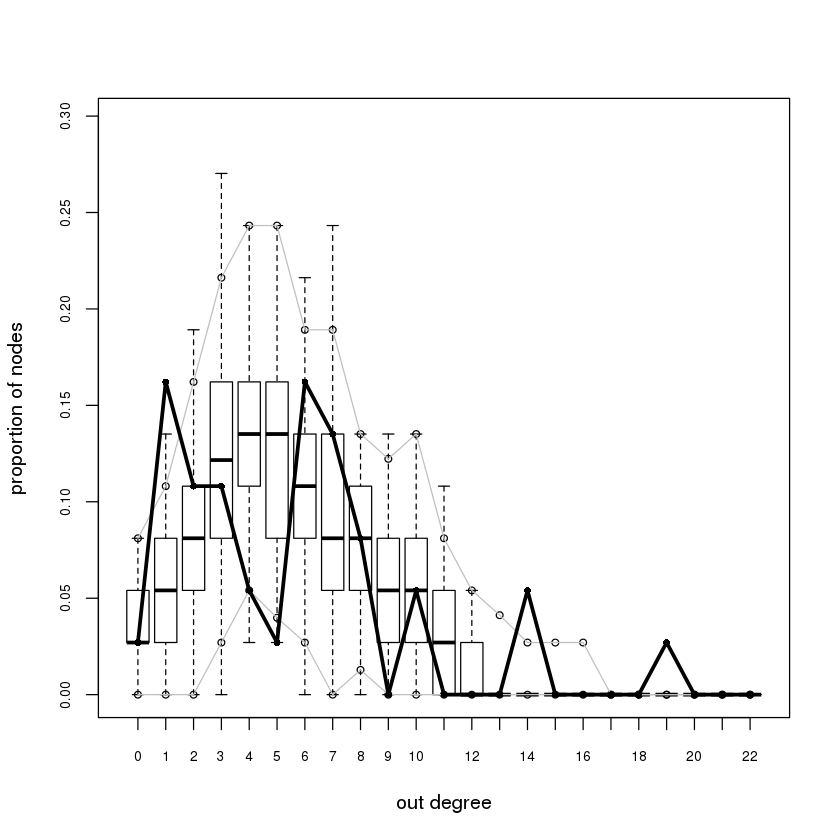

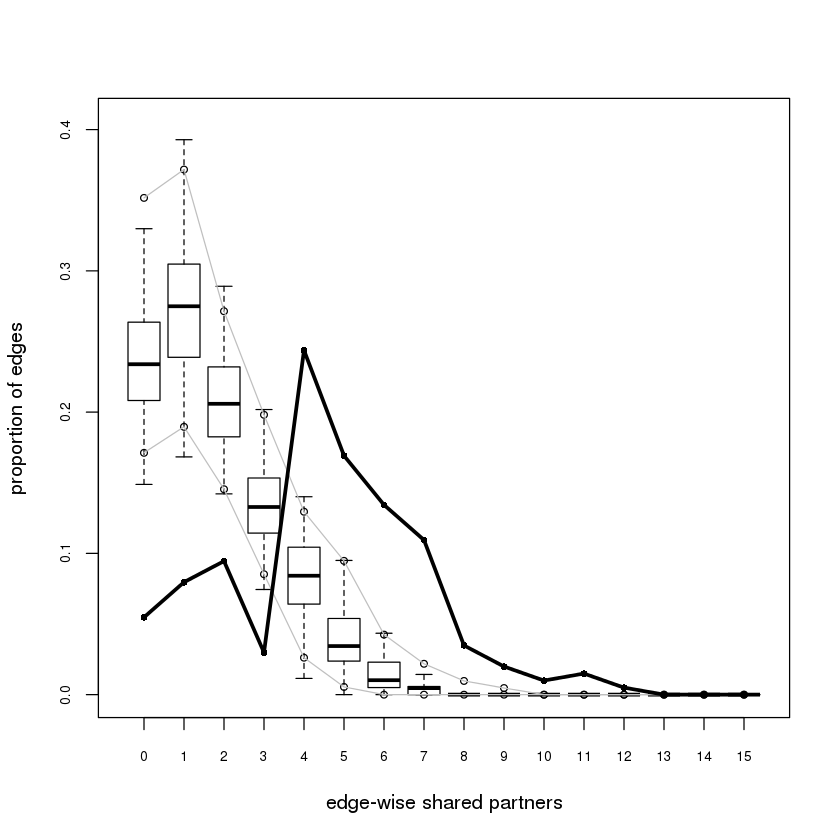

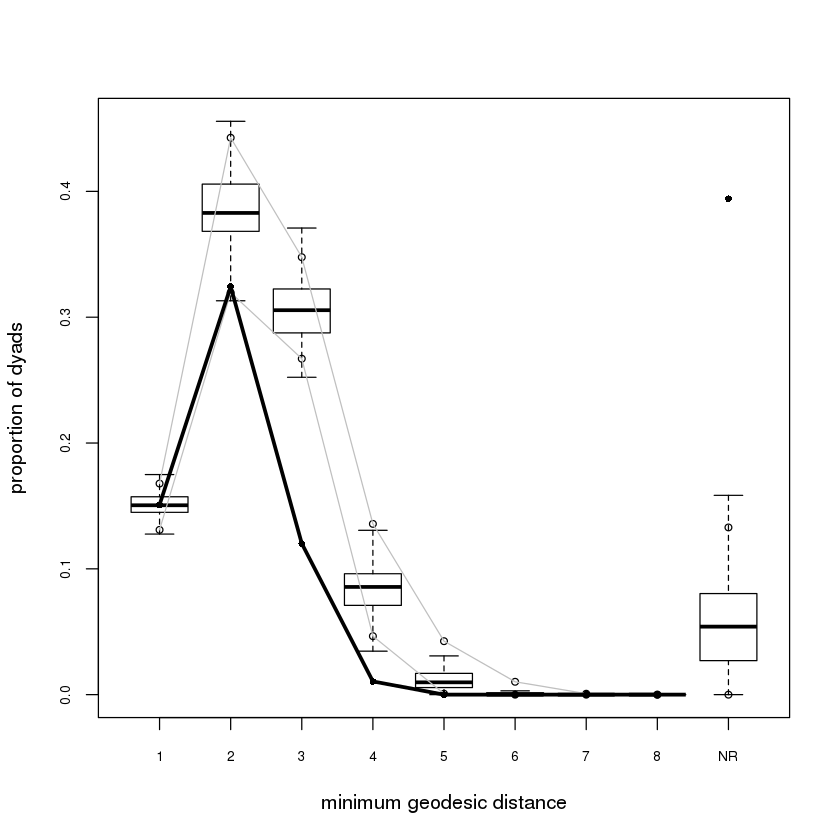

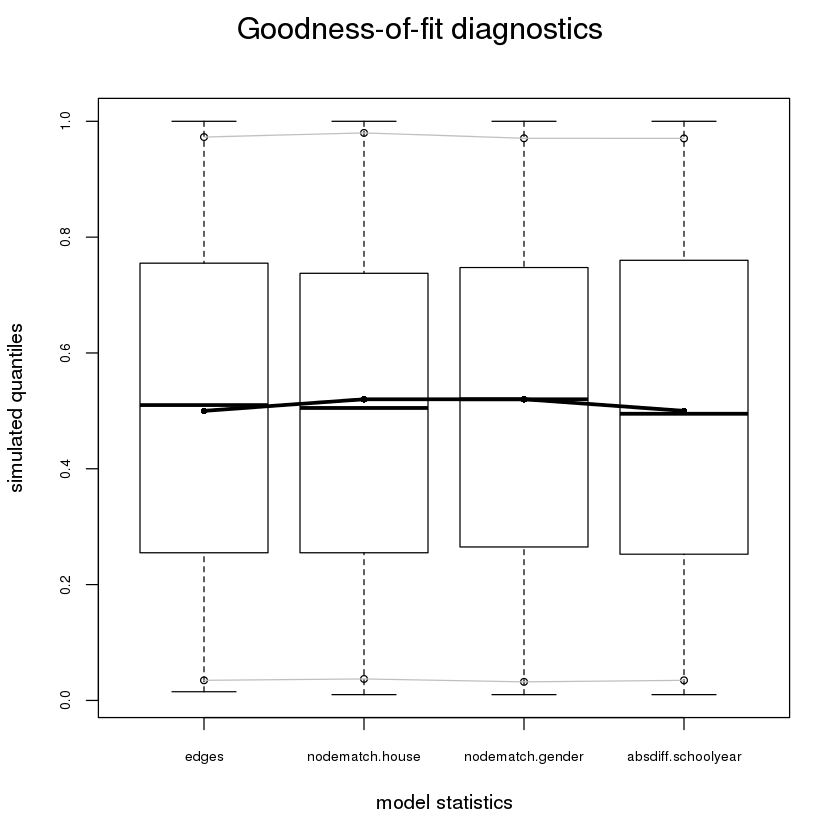

In [49]:
gofSpec0 = gof(spec0)
plot(gofSpec0)

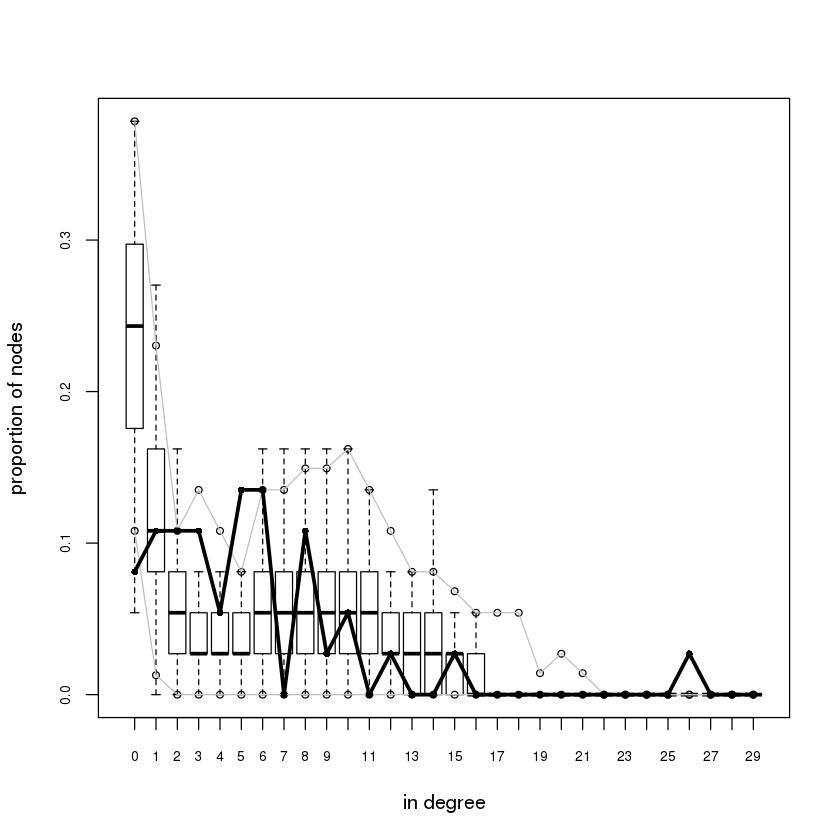

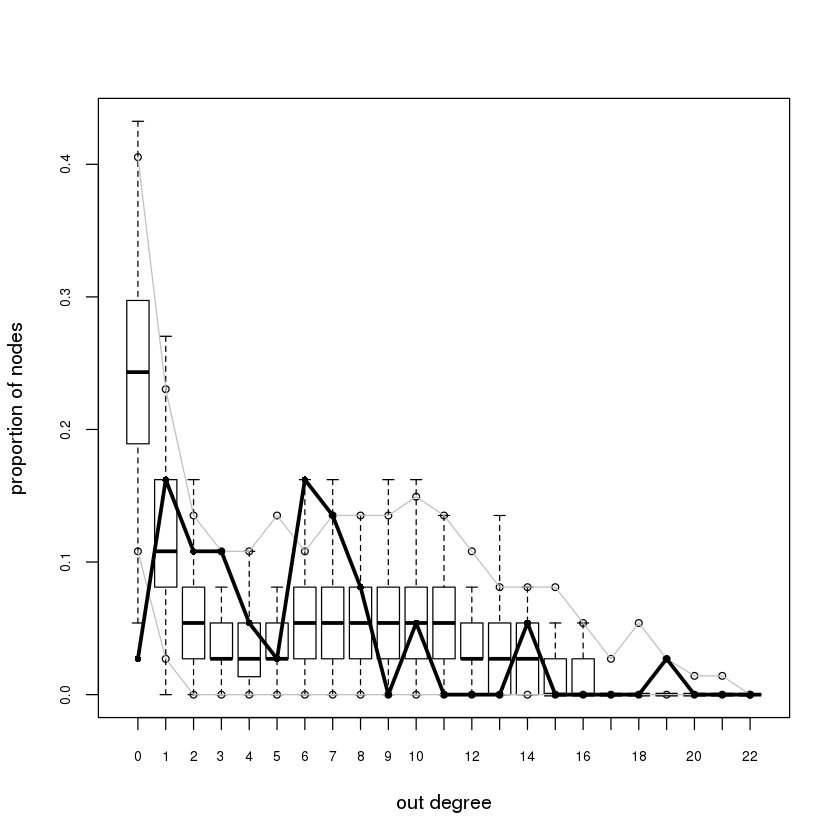

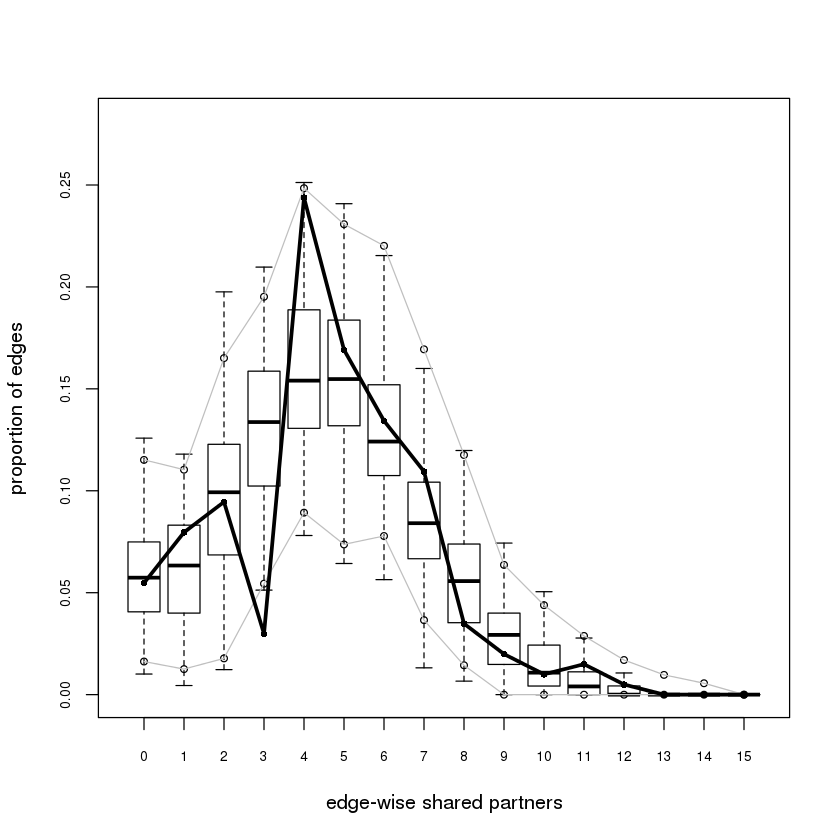

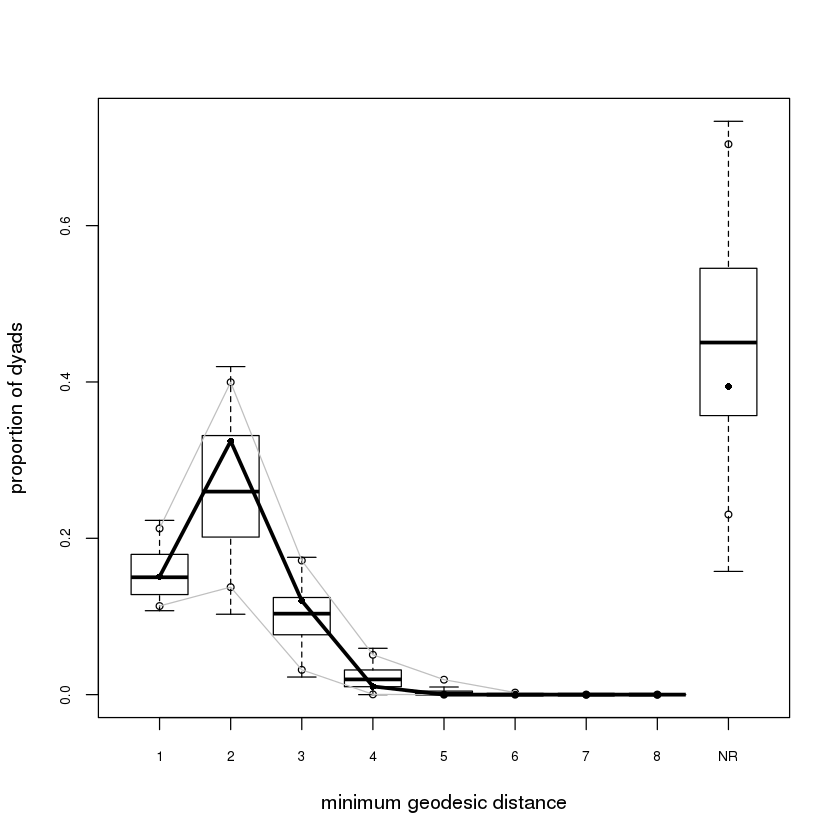

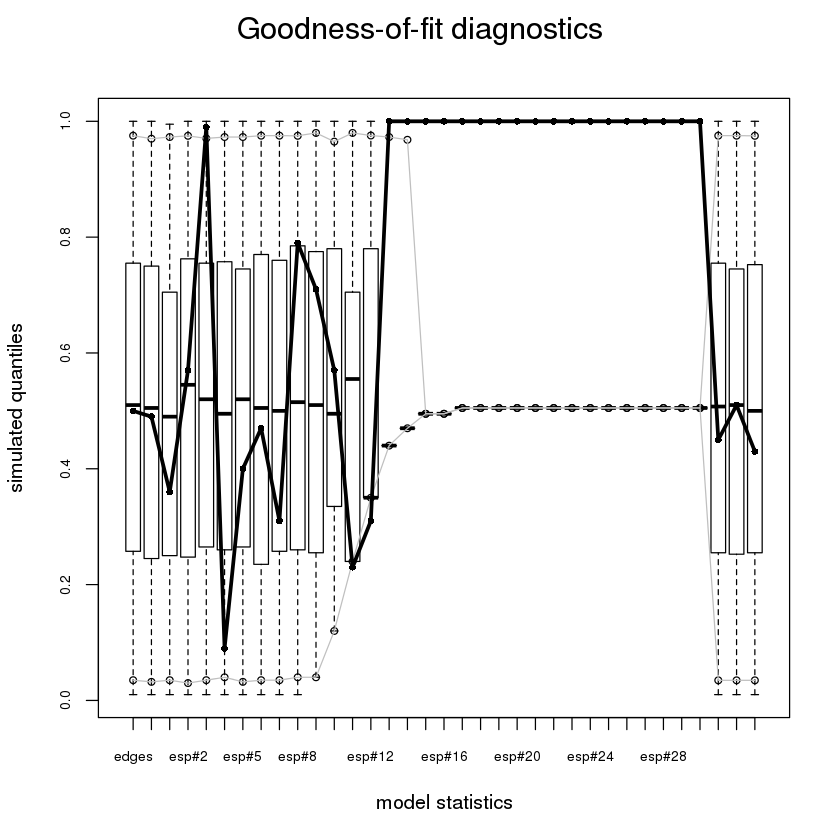

In [50]:
gofSpec1 = gof(spec1)
plot(gofSpec1)

In [51]:
library(latentnet)
lsm1 = ergmm(hpBinNet~
               euclidean(2)+
               rsender+rreceiver+
                nodematch("house")+
                nodematch("gender")+
                absdiff("schoolyear"),
             tofit='mkl',seed=1,verbose=T)

summary(lsm1)$pmean$coef.table

Generating initial values for MCMC:
Computing geodesic distances... Finished.
Computing MDS locations... Finished.
Computing other initial values... Finished.
Finding the conditional posterior mode... Finished.
Burning in... Backing off: too few acceptances. If you see this message several times in a row, use a longer burnin.
Backing off: too few acceptances. If you see this message several times in a row, use a longer burnin.
Backing off: too few acceptances. If you see this message several times in a row, use a longer burnin.
Backing off: too few acceptances. If you see this message several times in a row, use a longer burnin.
Finished.
Starting sampling run... Finished.
Post-processing the MCMC output:
Fitting the MKL locations... Finished.


NOTE: It is not certain whether it is appropriate to use latentnet's BIC to select latent space dimension, whether or not to include actor-specific random effects, and to compare clustered models with the unclustered model.


Estimate      2.5%     97.5% 2*min(Pr(>0),Pr(<0))
(Intercept)         5.47116271  3.671885  7.319791                0.000
nodematch.house     5.03242486  3.217465  7.004985                0.000
nodematch.gender   -0.08461997 -1.092197  0.797548                0.874
absdiff.schoolyear -1.66527901 -2.252332 -1.177864                0.000

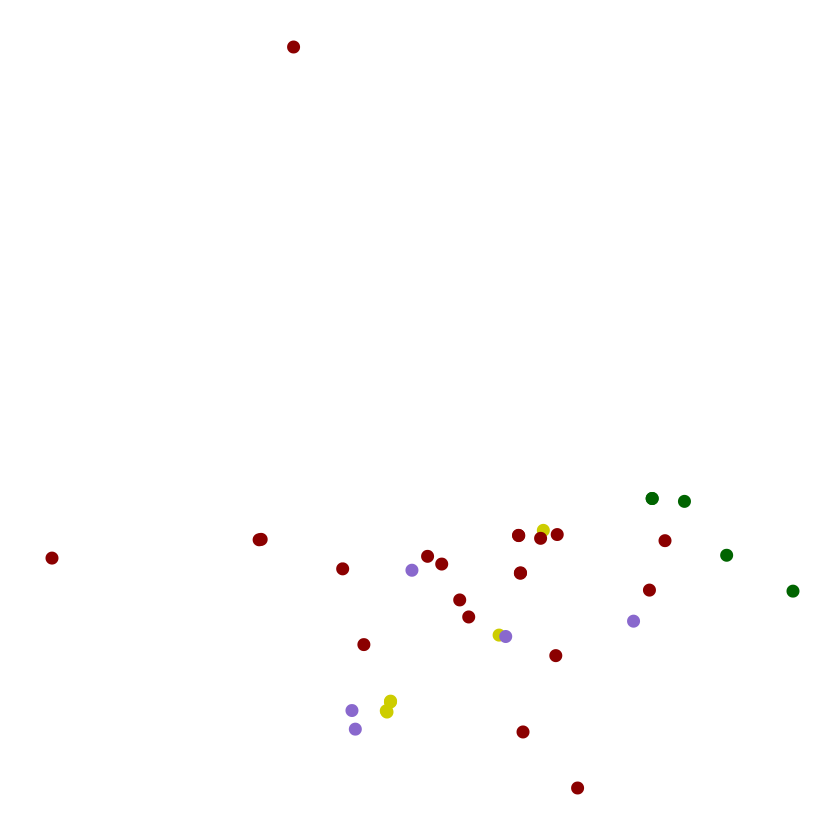

In [53]:
lsmDF = data.frame(x=lsm1$mkl$Z[,1],y=lsm1$mkl$Z[,2],
                   Col=c('darkred','yellow3','mediumpurple3','darkgreen')[V(hpig)$house])
lsm.ggplot = 
  ggplot(lsmDF,aes(x,y)) +
  geom_point(color=lsmDF$Col,size=3) +
  theme_blank()
lsm.ggplot

Neither start or onsets specified, assuming start=0
Onsets and termini not specified, assuming each network in network.list should have a discrete spell of length 1
Argument base.net not specified, using first element of network.list instead
Created net.obs.period to describe network
 Network observation period info:
  Number of observation spells: 1 
  Maximal time range observed: 0 until 6 
  Temporal mode: discrete 
  Time unit: step 
  Suggested time increment: 1 


No coordinate information found in network, running compute.animation


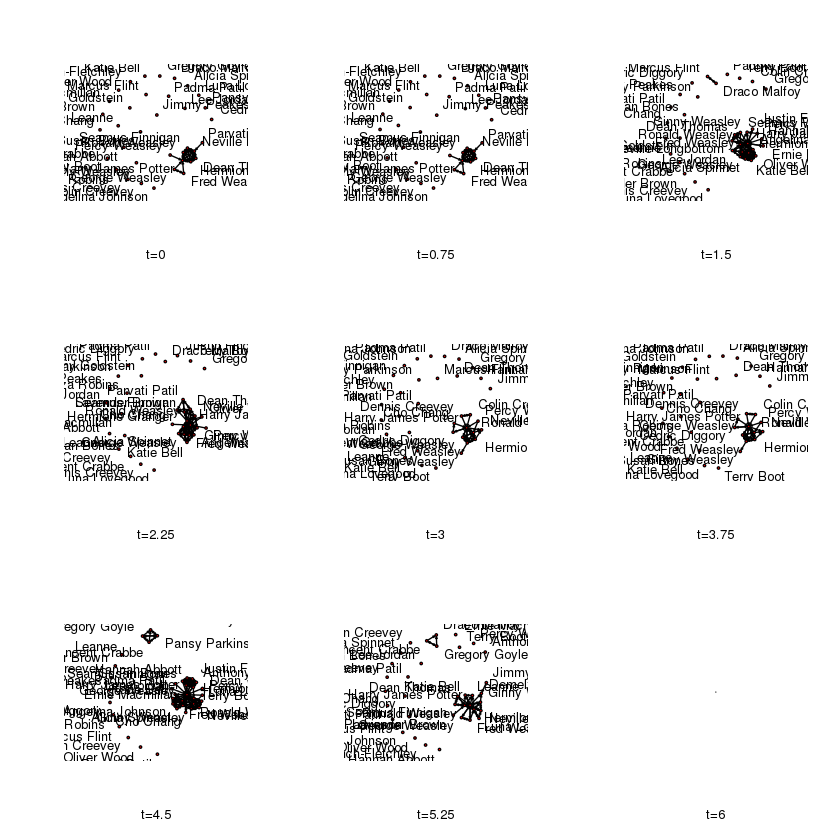

In [57]:
library(ndtv)
bkListNet = bkList = list()
for(bb in 1:6){
  bkList[[bb]] =
    as.matrix(read.table(paste("http://myweb.uiowa.edu/dksewell/hpbook",bb,".txt",sep="")))[-ind2rm,-ind2rm]
  diag(bkList[[bb]])=0
  colnames(bkList[[bb]]) = rownames(bkList[[bb]]) = hpnames[-ind2rm]
  bkListNet[[bb]] = network(bkList[[bb]],vertex.attr=as.data.frame(hp.attributes[-ind2rm,-1]))
}
hpnd = networkDynamic(network.list = bkListNet)

filmstrip(hpnd)
#render.animation(hpnd)
#ani.replay()

In [60]:
install.packages(c('scatterplot3d'),
                 lib='/home/jupyter/installedRPackages')

Calculating layout for network slice from time  0 to 1
Calculating layout for network slice from time  1 to 2
Calculating layout for network slice from time  2 to 3
Calculating layout for network slice from time  3 to 4
Calculating layout for network slice from time  4 to 5
Calculating layout for network slice from time  5 to 6
Calculating layout for network slice from time  6 to 7


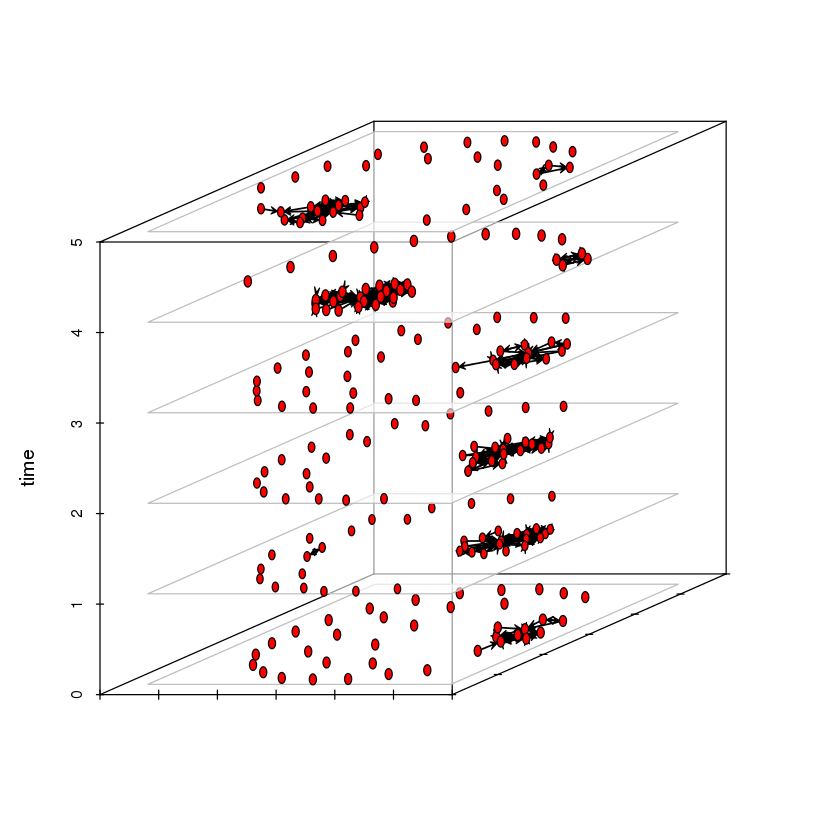

In [61]:
compute.animation(hpnd)
library(scatterplot3d)

timePrism(hpnd,at=c(0:5),
          displaylabels=FALSE,planes = TRUE,
          label.cex=0.5)


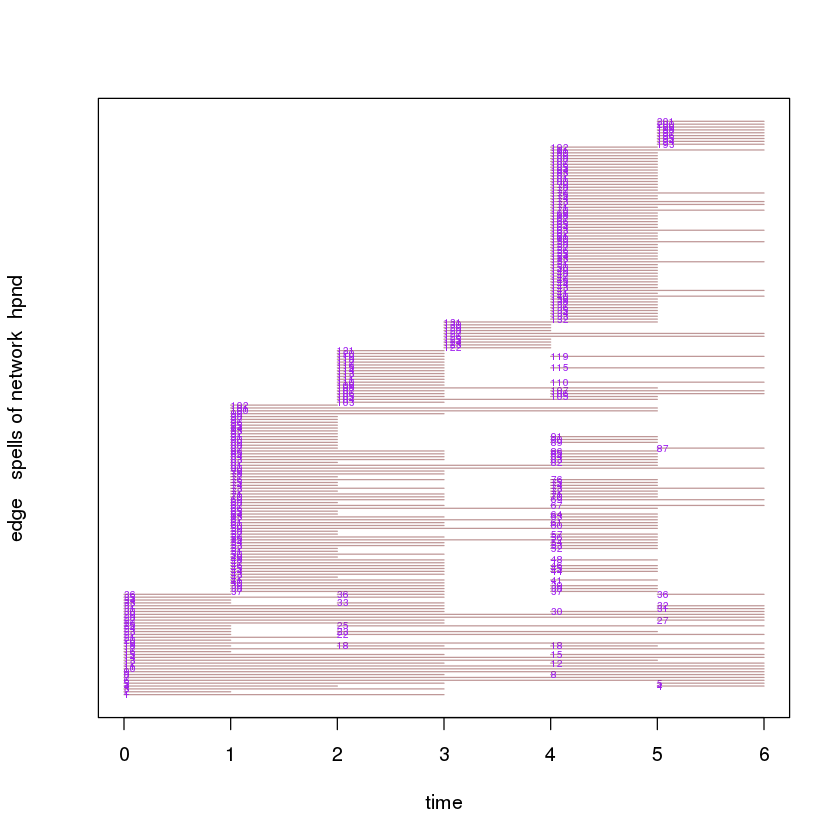

In [62]:
timeline(hpnd,plot.vertex.spells=FALSE)

collapsing slice networks ...
computing vertex positions using 1D sammon layout ...
  computing positions for slice 1
  computing positions for slice 2
  computing positions for slice 3
  computing positions for slice 4
  computing positions for slice 5
  computing positions for slice 6
rendering splines for each vertex ...


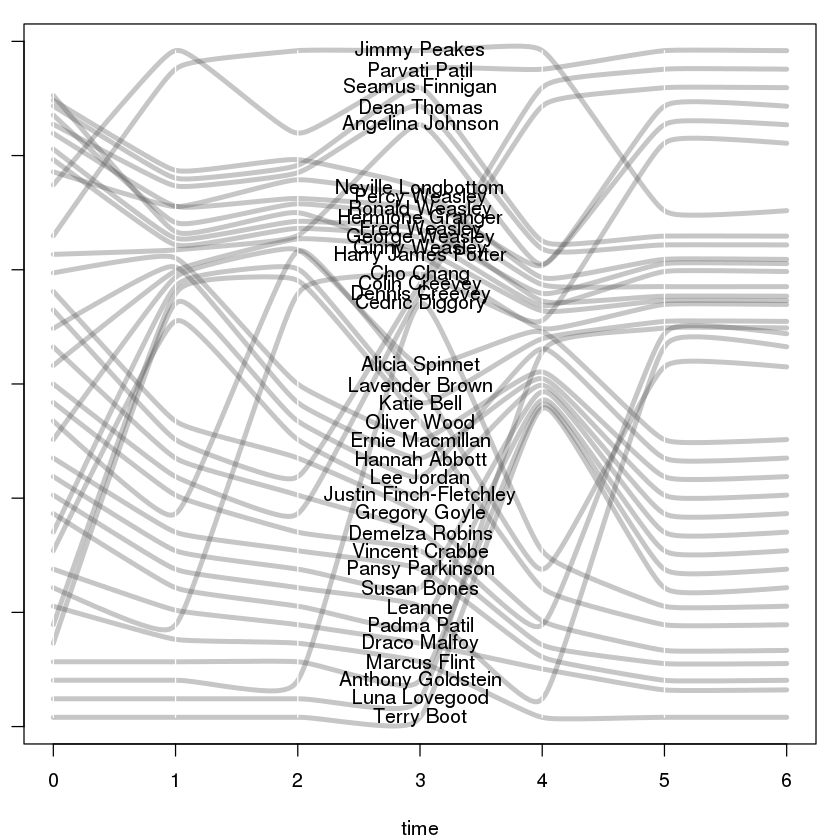

In [63]:
par(mar=c(4,1,1,1))
proximity.timeline(hpnd,default.dist=6,
          mode='sammon',labels.at=3,vertex.cex=4,
          yaxt='n')

In [65]:
try({

n1 = n - length(ind2rm)
hpArray = array(unlist(bkList),c(n1,n1,6))
options(warn=-1)
hpDnc = dnc(hpArray,M=0)
options(warn=0)
plot(hpDnc,pch=16,plotRGL=F)
plotrgl()
#small angles between actors imply proximity in the network
for(tt in 1:6){
  text3D(hpDnc$pm$X[1,tt,],hpDnc$pm$X[2,tt,],hpDnc$pm$X[3,tt,],
       labels=V(hpig)$name,colvar=V(hpig)$house,colkey=FALSE)
  for (i in 1:dim(hpDnc$pm$X)[3]) {
            lines3D(c(0, hpDnc$pm$X[1,tt,i]),
                    c(0,hpDnc$pm$X[2,tt,i]),
                    c(0, hpDnc$pm$X[3,tt,i]),
                    colkey=FALSE,add=TRUE)
  }
  plotrgl()
  readline()
}
    },silent=TRUE)